## 1. Import Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reproducibility
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## 2. Load Data 

In [2]:
# Load MNIST (using tf.keras.datasets)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


## 3. Data Preprocessing

In [3]:
# Normalize pixel values (0–255 -> 0–1)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [4]:
# Split training and validation data
X_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", x_test.shape)

Training set: (54000, 28, 28)
Validation set: (6000, 28, 28)
Test set: (10000, 28, 28)


Training set: (54000, 28, 28)
Validation set: (6000, 28, 28)
Test set: (10000, 28, 28)


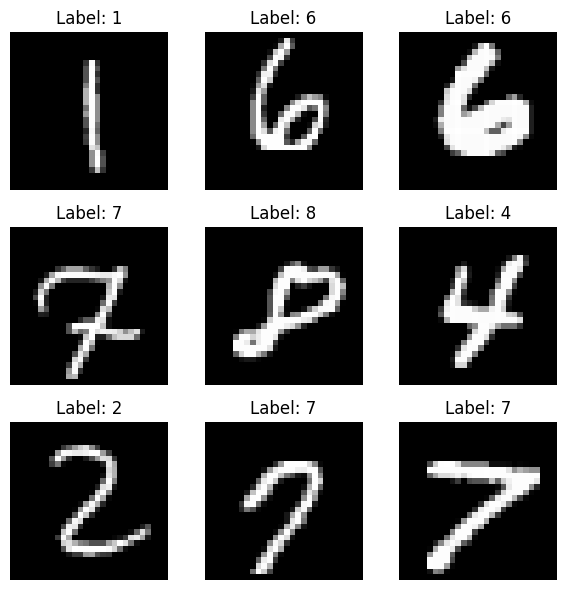

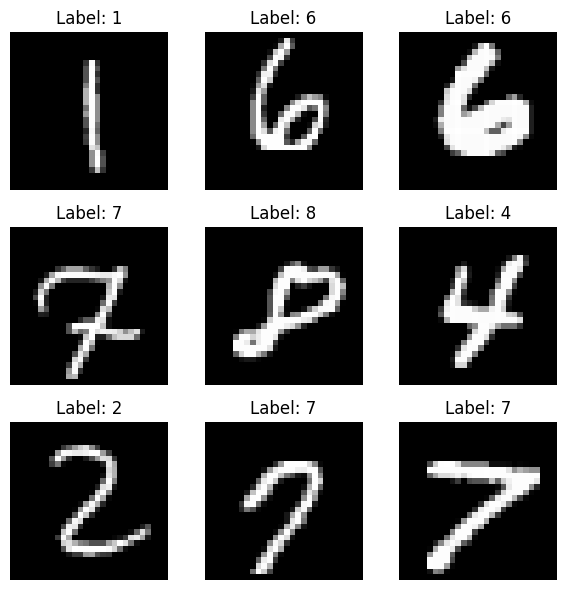

In [5]:
# Plot the first 9 images from the training set
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Model Definition and Compilation

In [6]:
# Add channel dimension (N, 28, 28) -> (N, 28, 28, 1) for TF (no. of channels at last)
X_train = np.expand_dims(X_train, axis=-1)
X_val   = np.expand_dims(X_val, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("After adding channel dim - Training:", X_train.shape)  # should be (N,28,28,1)

# model in TensorFlow
def LeNet5():
    model = keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=3, padding='valid', activation='relu'), # (26,26,32)
        layers.MaxPool2D(pool_size=2),                                        # (13,13,32)
        layers.Conv2D(64, kernel_size=3, padding='valid', activation='relu'), # (11,11,64)
        layers.Conv2D(64, kernel_size=3, padding='valid', activation='relu'), # (9,9,64)
        layers.MaxPool2D(pool_size=2),                                        # (4,4,64)
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(10)  # logits
    ])
    return model

model = LeNet5()
model.summary()

After adding channel dim - Training: (54000, 28, 28, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         102,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,254 (622.09 KB)

 Trainable params: 159,254 (622.09 KB)

 Non-trainable params: 0 (0.00 B)

After adding channel dim - Training: (54000, 28, 28, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         102,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,254 (622.09 KB)

 Trainable params: 159,254 (622.09 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Loss, optimizer and compile
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

## 5. Model Training

In [8]:
# Training parameters
batch_size = 128
n_epochs = 10

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True
)

Epoch 1/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 12:26 2s/step - accuracy: 0.0391 - loss: 2.3042

  2/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.0938 - loss: 2.2963

  3/422 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.1207 - loss: 2.2921

  5/422 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.1533 - loss: 2.2802

  6/422 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.1653 - loss: 2.2734

  8/422 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.1870 - loss: 2.2587

  9/422 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.1966 - loss: 2.2500

 10/422 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.2066 - loss: 2.2405

 11/422 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.2185 - loss: 2.2292

 12/422 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.2303 - loss: 2.2167

 13/422 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.2423 - loss: 2.2028

 14/422 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.2541 - loss: 2.1875

 15/422 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.2654 - loss: 2.1710

 16/422 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.2766 - loss: 2.1532

 18/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.2977 - loss: 2.1153

 19/422 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.3076 - loss: 2.0954

 20/422 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.3172 - loss: 2.0750

 21/422 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.3265 - loss: 2.0544

 22/422 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.3354 - loss: 2.0339

 24/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.3527 - loss: 1.9927

 25/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.3609 - loss: 1.9723

 26/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.3688 - loss: 1.9521

 27/422 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.3765 - loss: 1.9323

 28/422 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.3839 - loss: 1.9127

 29/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.3912 - loss: 1.8934

 30/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.3982 - loss: 1.8746

 31/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.4050 - loss: 1.8562

 33/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.4180 - loss: 1.8210

 34/422 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.4242 - loss: 1.8039

 35/422 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.4303 - loss: 1.7872

 36/422 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.4362 - loss: 1.7708

 37/422 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.4419 - loss: 1.7547

 38/422 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.4475 - loss: 1.7390

 39/422 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.4529 - loss: 1.7236

 40/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.4581 - loss: 1.7086

 41/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.4633 - loss: 1.6940

 43/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.4731 - loss: 1.6657

 44/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.4779 - loss: 1.6520

 45/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.4826 - loss: 1.6385

 46/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.4871 - loss: 1.6253

 47/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.4916 - loss: 1.6124

 49/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5002 - loss: 1.5872

 50/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5044 - loss: 1.5750

 51/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5084 - loss: 1.5631

 52/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5124 - loss: 1.5513

 53/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5163 - loss: 1.5398

 54/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5201 - loss: 1.5285

 55/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5238 - loss: 1.5175

 56/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5274 - loss: 1.5066

 57/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5309 - loss: 1.4960

 58/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5344 - loss: 1.4855

 59/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5378 - loss: 1.4752

 60/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5412 - loss: 1.4651

 61/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5444 - loss: 1.4552

 62/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5477 - loss: 1.4455

 63/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5508 - loss: 1.4359

 64/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5540 - loss: 1.4264

 65/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5570 - loss: 1.4170

 66/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5600 - loss: 1.4079

 67/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5630 - loss: 1.3989

 68/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5659 - loss: 1.3900

 69/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5688 - loss: 1.3812

 70/422 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5716 - loss: 1.3726

 71/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.5744 - loss: 1.3642

 72/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.5771 - loss: 1.3558

 73/422 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.5798 - loss: 1.3476

 74/422 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.5824 - loss: 1.3395

 75/422 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.5850 - loss: 1.3315

 76/422 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.5876 - loss: 1.3237

 77/422 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.5901 - loss: 1.3160

 78/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.5926 - loss: 1.3084

 79/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.5950 - loss: 1.3009

 80/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.5974 - loss: 1.2935

 81/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.5998 - loss: 1.2862

 82/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6021 - loss: 1.2791

 83/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6044 - loss: 1.2720

 84/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6066 - loss: 1.2651

 85/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6089 - loss: 1.2582

 86/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6111 - loss: 1.2515

 87/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6132 - loss: 1.2448

 88/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6153 - loss: 1.2383

 89/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6174 - loss: 1.2318

 90/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6195 - loss: 1.2255

 91/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6215 - loss: 1.2192

 92/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6235 - loss: 1.2130

 94/422 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6274 - loss: 1.2009

 96/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6312 - loss: 1.1891

 97/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6331 - loss: 1.1833

 98/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6349 - loss: 1.1776

 99/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6367 - loss: 1.1719

100/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6385 - loss: 1.1664

101/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6403 - loss: 1.1609

102/422 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6420 - loss: 1.1555

103/422 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6438 - loss: 1.1501

104/422 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6455 - loss: 1.1448

105/422 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6471 - loss: 1.1396

106/422 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6488 - loss: 1.1344

107/422 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6504 - loss: 1.1293

108/422 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6520 - loss: 1.1243

109/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6536 - loss: 1.1193

110/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6552 - loss: 1.1143

111/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6568 - loss: 1.1095

112/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6583 - loss: 1.1046

113/422 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6598 - loss: 1.0999

114/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6613 - loss: 1.0951

115/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6628 - loss: 1.0905

116/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6643 - loss: 1.0859

117/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6657 - loss: 1.0813

118/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6672 - loss: 1.0768

119/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6686 - loss: 1.0724

120/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6700 - loss: 1.0680

121/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6714 - loss: 1.0636

122/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6727 - loss: 1.0593

124/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6754 - loss: 1.0509

126/422 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6781 - loss: 1.0426

128/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6807 - loss: 1.0344

129/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6819 - loss: 1.0304

130/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6832 - loss: 1.0265

131/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6845 - loss: 1.0225

132/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6857 - loss: 1.0186

133/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6869 - loss: 1.0148

134/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6881 - loss: 1.0110

135/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6893 - loss: 1.0072

136/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6905 - loss: 1.0035

137/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6917 - loss: 0.9997

138/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6928 - loss: 0.9961

139/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6940 - loss: 0.9924

140/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6951 - loss: 0.9888

141/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6963 - loss: 0.9853

142/422 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6974 - loss: 0.9817

143/422 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.6985 - loss: 0.9782

144/422 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.6996 - loss: 0.9747

145/422 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7007 - loss: 0.9713

146/422 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7018 - loss: 0.9679

147/422 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7029 - loss: 0.9645

148/422 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7039 - loss: 0.9612

149/422 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7050 - loss: 0.9578

150/422 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7060 - loss: 0.9545

151/422 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7070 - loss: 0.9513

152/422 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7081 - loss: 0.9480

153/422 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7091 - loss: 0.9448

154/422 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7101 - loss: 0.9417

155/422 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7111 - loss: 0.9385

156/422 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7121 - loss: 0.9354

157/422 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7130 - loss: 0.9323

158/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7140 - loss: 0.9292

159/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7150 - loss: 0.9262

160/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7159 - loss: 0.9231

161/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7169 - loss: 0.9201

162/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7178 - loss: 0.9172

163/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7187 - loss: 0.9142

164/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7197 - loss: 0.9113

165/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7206 - loss: 0.9084

166/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7215 - loss: 0.9055

167/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7224 - loss: 0.9027

169/422 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7242 - loss: 0.8970

171/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7259 - loss: 0.8915

172/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7268 - loss: 0.8887

173/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7277 - loss: 0.8860

174/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7285 - loss: 0.8833

175/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7293 - loss: 0.8806

176/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7302 - loss: 0.8780

177/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7310 - loss: 0.8753

178/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7318 - loss: 0.8727

179/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7327 - loss: 0.8701

180/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7335 - loss: 0.8675

181/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7343 - loss: 0.8650

182/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7351 - loss: 0.8624

183/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7359 - loss: 0.8599

184/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7367 - loss: 0.8574

185/422 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.7374 - loss: 0.8549

186/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7382 - loss: 0.8525

187/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7390 - loss: 0.8500

189/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7405 - loss: 0.8452

190/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7413 - loss: 0.8428

191/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7420 - loss: 0.8404

192/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7427 - loss: 0.8381

193/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7435 - loss: 0.8357

195/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7449 - loss: 0.8311

196/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7456 - loss: 0.8288

197/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7464 - loss: 0.8265

198/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7471 - loss: 0.8243

200/422 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7485 - loss: 0.8198

201/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7492 - loss: 0.8176

203/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7505 - loss: 0.8132

205/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7519 - loss: 0.8089

206/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7526 - loss: 0.8068

207/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7532 - loss: 0.8046

208/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7539 - loss: 0.8025

209/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7545 - loss: 0.8004

210/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7552 - loss: 0.7984

212/422 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.7565 - loss: 0.7942

213/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7571 - loss: 0.7922

214/422 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.7578 - loss: 0.7902

215/422 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.7584 - loss: 0.7882

216/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7590 - loss: 0.7862

217/422 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7596 - loss: 0.7842

218/422 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7602 - loss: 0.7822

219/422 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7609 - loss: 0.7802

220/422 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7615 - loss: 0.7783

221/422 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7621 - loss: 0.7763

222/422 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7627 - loss: 0.7744

223/422 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7633 - loss: 0.7725

224/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7639 - loss: 0.7706

225/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7645 - loss: 0.7687

226/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7650 - loss: 0.7669

227/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7656 - loss: 0.7650

228/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7662 - loss: 0.7632

229/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7668 - loss: 0.7613

230/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7673 - loss: 0.7595

231/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7679 - loss: 0.7577

232/422 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7685 - loss: 0.7559

233/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7690 - loss: 0.7541

234/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7696 - loss: 0.7523

235/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7701 - loss: 0.7505

236/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7707 - loss: 0.7488

237/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7712 - loss: 0.7470

238/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7718 - loss: 0.7453

239/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7723 - loss: 0.7435

240/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7728 - loss: 0.7418

241/422 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7734 - loss: 0.7401

242/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7739 - loss: 0.7384

243/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7744 - loss: 0.7368

244/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7749 - loss: 0.7351

245/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7755 - loss: 0.7334

246/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7760 - loss: 0.7318

247/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7765 - loss: 0.7301

248/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7770 - loss: 0.7285

250/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7780 - loss: 0.7253

252/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7790 - loss: 0.7221

253/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7795 - loss: 0.7205

254/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7800 - loss: 0.7189

255/422 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7805 - loss: 0.7173

257/422 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.7814 - loss: 0.7142 

258/422 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.7819 - loss: 0.7127

259/422 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.7824 - loss: 0.7112

260/422 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.7829 - loss: 0.7097

261/422 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.7833 - loss: 0.7081

262/422 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.7838 - loss: 0.7066

264/422 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7847 - loss: 0.7037

266/422 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7856 - loss: 0.7007

267/422 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7861 - loss: 0.6993

268/422 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7865 - loss: 0.6978

269/422 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7870 - loss: 0.6964

270/422 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7874 - loss: 0.6949

271/422 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7879 - loss: 0.6935

272/422 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7883 - loss: 0.6921

273/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7887 - loss: 0.6907

274/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7892 - loss: 0.6893

276/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7901 - loss: 0.6865

278/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7909 - loss: 0.6837

279/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7913 - loss: 0.6823

280/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7918 - loss: 0.6810

281/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7922 - loss: 0.6796

282/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7926 - loss: 0.6782

283/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7930 - loss: 0.6769

284/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7934 - loss: 0.6756

285/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7938 - loss: 0.6742

286/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7943 - loss: 0.6729

287/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7947 - loss: 0.6716

288/422 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7951 - loss: 0.6703

289/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7955 - loss: 0.6690

291/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7963 - loss: 0.6664

292/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7967 - loss: 0.6651

294/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7975 - loss: 0.6626

296/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7982 - loss: 0.6601

297/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7986 - loss: 0.6588

298/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7990 - loss: 0.6576

300/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7998 - loss: 0.6551

301/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8002 - loss: 0.6539

302/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8005 - loss: 0.6527

303/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8009 - loss: 0.6515

304/422 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8013 - loss: 0.6502

305/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8017 - loss: 0.6490

306/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8020 - loss: 0.6478

307/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8024 - loss: 0.6467

308/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8028 - loss: 0.6455

309/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8031 - loss: 0.6443

310/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8035 - loss: 0.6431

311/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8039 - loss: 0.6420

312/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8042 - loss: 0.6408

313/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8046 - loss: 0.6396

314/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8049 - loss: 0.6385

315/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8053 - loss: 0.6374

316/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8056 - loss: 0.6362

317/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8060 - loss: 0.6351

318/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8063 - loss: 0.6340

319/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8067 - loss: 0.6328

320/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8070 - loss: 0.6317

321/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8074 - loss: 0.6306

322/422 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8077 - loss: 0.6295

323/422 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8081 - loss: 0.6284

324/422 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8084 - loss: 0.6273

325/422 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8087 - loss: 0.6262

326/422 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8091 - loss: 0.6251

327/422 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8094 - loss: 0.6240

328/422 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8098 - loss: 0.6229

329/422 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8101 - loss: 0.6219

330/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8104 - loss: 0.6208

331/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8108 - loss: 0.6197

332/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8111 - loss: 0.6187

333/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8114 - loss: 0.6176

334/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8117 - loss: 0.6166

335/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8121 - loss: 0.6155

336/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8124 - loss: 0.6145

337/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8127 - loss: 0.6134

338/422 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8130 - loss: 0.6124

340/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8137 - loss: 0.6104

342/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8143 - loss: 0.6083

343/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8146 - loss: 0.6073

345/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8152 - loss: 0.6053

347/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8158 - loss: 0.6033

349/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8164 - loss: 0.6014

350/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8167 - loss: 0.6004

351/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8170 - loss: 0.5994

353/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8176 - loss: 0.5975

354/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8179 - loss: 0.5965

355/422 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8182 - loss: 0.5956

357/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8188 - loss: 0.5937

359/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8194 - loss: 0.5918

361/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8200 - loss: 0.5899

363/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8206 - loss: 0.5880

365/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8211 - loss: 0.5862

366/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8214 - loss: 0.5853

367/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8217 - loss: 0.5844

368/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8220 - loss: 0.5835

370/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8225 - loss: 0.5817

372/422 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8231 - loss: 0.5799

373/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8234 - loss: 0.5790

374/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8236 - loss: 0.5781

375/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8239 - loss: 0.5772

376/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8242 - loss: 0.5763

377/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8245 - loss: 0.5755

378/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8247 - loss: 0.5746

380/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8253 - loss: 0.5729

381/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8255 - loss: 0.5720

383/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8261 - loss: 0.5703

385/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8266 - loss: 0.5686

387/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8271 - loss: 0.5669

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8274 - loss: 0.5661

389/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8276 - loss: 0.5652

390/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8279 - loss: 0.5644

391/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8281 - loss: 0.5636

392/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8284 - loss: 0.5628

393/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8286 - loss: 0.5619

394/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8289 - loss: 0.5611

395/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8291 - loss: 0.5603

396/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8294 - loss: 0.5595

397/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8296 - loss: 0.5587

398/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8299 - loss: 0.5579

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8301 - loss: 0.5571

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8304 - loss: 0.5563

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8306 - loss: 0.5555

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8309 - loss: 0.5547

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8311 - loss: 0.5539

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8314 - loss: 0.5531

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8316 - loss: 0.5523

406/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8319 - loss: 0.5515

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8321 - loss: 0.5507

408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8323 - loss: 0.5500

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8326 - loss: 0.5492

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8328 - loss: 0.5484

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8331 - loss: 0.5476

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8333 - loss: 0.5469

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8335 - loss: 0.5461

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8338 - loss: 0.5453

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8340 - loss: 0.5446

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8342 - loss: 0.5438

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8345 - loss: 0.5431

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8347 - loss: 0.5423

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8349 - loss: 0.5416

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8352 - loss: 0.5408

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8354 - loss: 0.5401

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8356 - loss: 0.5393

422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.9317 - loss: 0.2278 - val_accuracy: 0.9815 - val_loss: 0.0619


Epoch 2/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 33s 81ms/step - accuracy: 0.9844 - loss: 0.0707

  3/422 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9831 - loss: 0.0676

  4/422 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9824 - loss: 0.0663

  6/422 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9809 - loss: 0.0652

  7/422 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9808 - loss: 0.0642

  9/422 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9813 - loss: 0.0619

 11/422 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9815 - loss: 0.0604

 13/422 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9818 - loss: 0.0589

 14/422 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9819 - loss: 0.0584

 15/422 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9820 - loss: 0.0579

 16/422 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9820 - loss: 0.0576

 17/422 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9820 - loss: 0.0574

 18/422 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9819 - loss: 0.0572

 19/422 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9819 - loss: 0.0570

 20/422 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9818 - loss: 0.0569

 21/422 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9818 - loss: 0.0569

 22/422 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9817 - loss: 0.0568

 23/422 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9817 - loss: 0.0569

 24/422 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9817 - loss: 0.0569

 25/422 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9816 - loss: 0.0569

 26/422 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9816 - loss: 0.0570

 27/422 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9815 - loss: 0.0572

 28/422 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9814 - loss: 0.0572

 30/422 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9814 - loss: 0.0575

 31/422 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9813 - loss: 0.0576

 32/422 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9812 - loss: 0.0578

 33/422 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9812 - loss: 0.0580

 34/422 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9811 - loss: 0.0581

 35/422 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9810 - loss: 0.0583

 36/422 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9810 - loss: 0.0585

 37/422 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9809 - loss: 0.0587

 38/422 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9808 - loss: 0.0588

 39/422 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9808 - loss: 0.0589

 40/422 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9807 - loss: 0.0591

 41/422 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9807 - loss: 0.0592

 42/422 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9807 - loss: 0.0593

 43/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9806 - loss: 0.0595

 44/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9806 - loss: 0.0596

 45/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9805 - loss: 0.0597

 46/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9805 - loss: 0.0597

 47/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9805 - loss: 0.0598

 48/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9805 - loss: 0.0598

 49/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9805 - loss: 0.0598

 50/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9805 - loss: 0.0599

 51/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9804 - loss: 0.0599

 52/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9804 - loss: 0.0600

 53/422 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9804 - loss: 0.0600

 54/422 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9804 - loss: 0.0601

 55/422 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.9804 - loss: 0.0601

 56/422 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9804 - loss: 0.0601

 57/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9804 - loss: 0.0602

 58/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9803 - loss: 0.0603

 59/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9803 - loss: 0.0603

 60/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9803 - loss: 0.0604

 61/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9803 - loss: 0.0605

 62/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9802 - loss: 0.0606

 63/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9802 - loss: 0.0607

 64/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9802 - loss: 0.0607

 65/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9802 - loss: 0.0608

 66/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9802 - loss: 0.0609

 67/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9801 - loss: 0.0610

 68/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9801 - loss: 0.0611

 69/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9801 - loss: 0.0612

 70/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9801 - loss: 0.0613

 71/422 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9801 - loss: 0.0614

 72/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9801 - loss: 0.0615

 73/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9800 - loss: 0.0615

 74/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9800 - loss: 0.0616

 75/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9800 - loss: 0.0617

 76/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9800 - loss: 0.0618

 77/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9800 - loss: 0.0619

 78/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9799 - loss: 0.0619

 79/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9799 - loss: 0.0620

 80/422 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9799 - loss: 0.0621

 81/422 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9799 - loss: 0.0621

 82/422 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9799 - loss: 0.0622

 83/422 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.9798 - loss: 0.0623

 84/422 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.9798 - loss: 0.0623

 85/422 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.9798 - loss: 0.0624

 86/422 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.9798 - loss: 0.0625

 88/422 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9797 - loss: 0.0626

 89/422 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9797 - loss: 0.0627

 90/422 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9797 - loss: 0.0627

 91/422 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9797 - loss: 0.0628

 92/422 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9797 - loss: 0.0629

 93/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9796 - loss: 0.0629

 94/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9796 - loss: 0.0630

 95/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9796 - loss: 0.0630

 96/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9796 - loss: 0.0631

 97/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9796 - loss: 0.0632

 98/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9796 - loss: 0.0632

 99/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9796 - loss: 0.0633

100/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9796 - loss: 0.0633

101/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9795 - loss: 0.0634

102/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9795 - loss: 0.0634

103/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9795 - loss: 0.0635

104/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9795 - loss: 0.0635

105/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9795 - loss: 0.0636

106/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9795 - loss: 0.0636

107/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9795 - loss: 0.0637

108/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9795 - loss: 0.0637

109/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9795 - loss: 0.0637

110/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9794 - loss: 0.0638

111/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9794 - loss: 0.0638

112/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9794 - loss: 0.0638

113/422 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9794 - loss: 0.0639

114/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9794 - loss: 0.0639

115/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9794 - loss: 0.0639

116/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9794 - loss: 0.0640

117/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9794 - loss: 0.0640

118/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9794 - loss: 0.0641

119/422 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9794 - loss: 0.0641

120/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9794 - loss: 0.0641

121/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9794 - loss: 0.0642

122/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0642

123/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0643

124/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0643

125/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0643

126/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0644

127/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0644

128/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0644

129/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0645

130/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0645

131/422 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9793 - loss: 0.0646

132/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9793 - loss: 0.0646

133/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9793 - loss: 0.0646

134/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0647

135/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0647

136/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0647

137/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0647

138/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0648

139/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0648

140/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0648

141/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0649

142/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0649

143/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0649

144/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0649

145/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0650

146/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0650

147/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0650

148/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0650

149/422 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9792 - loss: 0.0651

150/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0651

151/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0651

152/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0651

153/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0652

154/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0652

155/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0652

156/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0652

157/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0652

158/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0652

159/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0652

160/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0653

161/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0653

162/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0653

163/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0653

164/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9792 - loss: 0.0653

165/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0653

166/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0653

167/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0653

168/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0653

169/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0653

170/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0653

171/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0654

172/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0654

173/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0654

174/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0654

175/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0654

176/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0654

177/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0654

178/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9792 - loss: 0.0654

179/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

180/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

181/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

182/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

183/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

185/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

186/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

187/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

188/422 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.9792 - loss: 0.0654

189/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

190/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

191/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

192/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

193/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9792 - loss: 0.0654

194/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9792 - loss: 0.0654

195/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9792 - loss: 0.0654

196/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9792 - loss: 0.0654

197/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

198/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

200/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

201/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

202/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

203/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

204/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

205/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

206/422 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9792 - loss: 0.0654

207/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0654

208/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0654

209/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0654

210/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0654

211/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

212/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

213/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

214/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

215/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

216/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

217/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

218/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

219/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9792 - loss: 0.0653

220/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9793 - loss: 0.0653

221/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9793 - loss: 0.0653

222/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0653

223/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0653

224/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

225/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

226/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

227/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

228/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

229/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

230/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

231/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

232/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

233/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

234/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

235/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0652

236/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0651

237/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0651

238/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9793 - loss: 0.0651

239/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9793 - loss: 0.0651

240/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9793 - loss: 0.0651

241/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9793 - loss: 0.0651

242/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9793 - loss: 0.0651

243/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9793 - loss: 0.0651

244/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9794 - loss: 0.0651

245/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9794 - loss: 0.0650

246/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

247/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

248/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

249/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

250/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

251/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

252/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

253/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

254/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

255/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9794 - loss: 0.0650

256/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

257/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

258/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

259/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

260/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

261/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

262/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

263/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

264/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

265/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9794 - loss: 0.0649

266/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9795 - loss: 0.0649

267/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9795 - loss: 0.0648

268/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9795 - loss: 0.0648

269/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9795 - loss: 0.0648

270/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9795 - loss: 0.0648

271/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9795 - loss: 0.0648

272/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0648 

273/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0648

274/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0648

275/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0648

276/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0648

277/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0648

278/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0647

279/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0647

280/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0647

282/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0647

283/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0647

284/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9795 - loss: 0.0647

286/422 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9795 - loss: 0.0647

288/422 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9796 - loss: 0.0646

290/422 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9796 - loss: 0.0646

292/422 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9796 - loss: 0.0646

294/422 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9796 - loss: 0.0646

296/422 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9796 - loss: 0.0646

298/422 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9796 - loss: 0.0645

299/422 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9796 - loss: 0.0645

301/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

302/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

303/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

304/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

305/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

306/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0644

307/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0644

308/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

310/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

311/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

312/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

313/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

314/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0644

315/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

316/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

317/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

318/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

319/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0643

320/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0643

321/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0643

322/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0643

323/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0643

324/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0642

325/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0642

327/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0642

328/422 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9797 - loss: 0.0642

329/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0642

331/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0642

333/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0641

335/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0641

336/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0641

337/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0641

338/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0641

339/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0641

340/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0641

341/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0640

342/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0640

343/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0640

344/422 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9798 - loss: 0.0640

345/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9798 - loss: 0.0640

346/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9798 - loss: 0.0640

347/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9798 - loss: 0.0640

348/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9798 - loss: 0.0640

349/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9798 - loss: 0.0639

350/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9798 - loss: 0.0639

351/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9799 - loss: 0.0639

352/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9799 - loss: 0.0639

353/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9799 - loss: 0.0639

354/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9799 - loss: 0.0639

355/422 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9799 - loss: 0.0639

356/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

357/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

358/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

359/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0638

360/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0638

361/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

362/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

363/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

364/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

365/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

366/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

367/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

368/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

369/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

370/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

371/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

372/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

373/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

374/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9800 - loss: 0.0637

375/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9800 - loss: 0.0637

376/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0637

377/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0637

378/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0637

379/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0637

380/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

381/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

382/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

383/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

384/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

385/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

386/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

387/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0636

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9800 - loss: 0.0635

391/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9800 - loss: 0.0635

392/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9800 - loss: 0.0635

393/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9800 - loss: 0.0635

394/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9800 - loss: 0.0635

395/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9800 - loss: 0.0635

396/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9800 - loss: 0.0635

397/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9800 - loss: 0.0635

398/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0635

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0635

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0634

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0634

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0634

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0634

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0634

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0634

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9801 - loss: 0.0634

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0634

408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0634

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0633

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0632

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9801 - loss: 0.0632

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9802 - loss: 0.0632

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9802 - loss: 0.0632

422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9821 - loss: 0.0583 - val_accuracy: 0.9853 - val_loss: 0.0476


Epoch 3/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 1:30:01 13s/step - accuracy: 0.9844 - loss: 0.0750

  2/422 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - accuracy: 0.9824 - loss: 0.0750   

  3/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9822 - loss: 0.0699

  4/422 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.9818 - loss: 0.0661

  5/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9814 - loss: 0.0642

  6/422 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.9814 - loss: 0.0620

  7/422 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.9818 - loss: 0.0597

  8/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9824 - loss: 0.0573

  9/422 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9829 - loss: 0.0552

 10/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.9834 - loss: 0.0534

 11/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.9839 - loss: 0.0517

 12/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9842 - loss: 0.0502

 13/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9845 - loss: 0.0490

 14/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9848 - loss: 0.0479

 15/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9851 - loss: 0.0469

 16/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9853 - loss: 0.0460

 18/422 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.9857 - loss: 0.0447

 19/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9858 - loss: 0.0441

 20/422 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.9860 - loss: 0.0436

 21/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9861 - loss: 0.0432

 22/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9863 - loss: 0.0429

 23/422 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.9864 - loss: 0.0426

 24/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9865 - loss: 0.0423

 25/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9866 - loss: 0.0421

 26/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9867 - loss: 0.0418

 27/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9868 - loss: 0.0416

 28/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9868 - loss: 0.0414

 29/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9869 - loss: 0.0412

 31/422 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.9870 - loss: 0.0408

 33/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9871 - loss: 0.0406

 34/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9872 - loss: 0.0405

 35/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9872 - loss: 0.0405

 36/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9872 - loss: 0.0404

 37/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9872 - loss: 0.0404

 38/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9872 - loss: 0.0403

 40/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9872 - loss: 0.0402

 41/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9872 - loss: 0.0402

 42/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9872 - loss: 0.0402

 43/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9872 - loss: 0.0402

 45/422 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9872 - loss: 0.0402

 47/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9872 - loss: 0.0401

 48/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9872 - loss: 0.0400

 49/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9873 - loss: 0.0400

 50/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9873 - loss: 0.0400

 51/422 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9873 - loss: 0.0400

 52/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9873 - loss: 0.0400

 53/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9873 - loss: 0.0399

 54/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9873 - loss: 0.0399

 55/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9873 - loss: 0.0399

 56/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9873 - loss: 0.0399

 57/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9873 - loss: 0.0400

 58/422 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9873 - loss: 0.0400

 59/422 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9873 - loss: 0.0400

 60/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9873 - loss: 0.0400

 61/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9873 - loss: 0.0401

 62/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9873 - loss: 0.0401

 63/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9873 - loss: 0.0401

 64/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9873 - loss: 0.0402

 65/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9873 - loss: 0.0402

 66/422 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9873 - loss: 0.0402

 67/422 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9873 - loss: 0.0403

 68/422 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9873 - loss: 0.0403

 69/422 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9873 - loss: 0.0404

 70/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9873 - loss: 0.0404

 71/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9873 - loss: 0.0405

 72/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9873 - loss: 0.0405

 73/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9873 - loss: 0.0406

 74/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9873 - loss: 0.0406

 75/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9873 - loss: 0.0407

 76/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9872 - loss: 0.0407

 77/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9872 - loss: 0.0408

 78/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9872 - loss: 0.0408

 79/422 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9872 - loss: 0.0409

 80/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9872 - loss: 0.0409

 81/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9872 - loss: 0.0410

 82/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9872 - loss: 0.0410

 83/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9872 - loss: 0.0411

 84/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9872 - loss: 0.0411

 85/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9872 - loss: 0.0412

 87/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9872 - loss: 0.0413

 88/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9871 - loss: 0.0413

 89/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9871 - loss: 0.0414

 90/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9871 - loss: 0.0414

 92/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9871 - loss: 0.0415

 93/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9871 - loss: 0.0415

 94/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9871 - loss: 0.0416

 95/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9871 - loss: 0.0416

 96/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9871 - loss: 0.0417

 97/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9871 - loss: 0.0417

 98/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9870 - loss: 0.0417

 99/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9870 - loss: 0.0418

100/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9870 - loss: 0.0418

101/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0418

102/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0419

103/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0419

104/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0419

105/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0419

106/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0420

107/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0420

108/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9869 - loss: 0.0420

109/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0420

110/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0421

111/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0421

112/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0421

113/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0421

114/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0421

115/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0422

116/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0422

117/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0422

118/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0422

119/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0423

120/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0423

121/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0423

122/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0424

123/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0424

124/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0424

125/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0425

126/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0425

127/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0425

128/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0426

129/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9868 - loss: 0.0426

130/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9868 - loss: 0.0426

131/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9868 - loss: 0.0427

132/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9868 - loss: 0.0427

133/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9868 - loss: 0.0427

134/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0428

135/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0428

136/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0428

137/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0428

138/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

139/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

140/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

141/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

142/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

143/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0430

144/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0430

145/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0430

146/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0430

147/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

148/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

149/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

150/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

151/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

152/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0432

153/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0432

154/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0432

155/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0432

156/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0432

157/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0432

158/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0432

159/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0432

160/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0433

161/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0433

162/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0433

163/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0433

164/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

165/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

166/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

167/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

168/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

169/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

170/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

171/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

172/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0434

173/422 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9867 - loss: 0.0434

174/422 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9867 - loss: 0.0434

175/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0434

176/422 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9867 - loss: 0.0434

177/422 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9867 - loss: 0.0434

178/422 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9867 - loss: 0.0434

179/422 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9867 - loss: 0.0434

180/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0434

181/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0434

182/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0434

183/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0434

184/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0434

185/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0434

186/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0434

187/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0434

188/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0435

189/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0435

190/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0435

191/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0435

192/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0435

193/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0435

194/422 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9867 - loss: 0.0435

195/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

196/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

197/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

198/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

199/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

200/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

201/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

202/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

203/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

204/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

205/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

206/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

207/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

208/422 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9867 - loss: 0.0435

209/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

210/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

211/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

212/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

213/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

214/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

215/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

216/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

217/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

218/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

219/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

220/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

221/422 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9867 - loss: 0.0435

222/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0435

223/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0435

224/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0435

225/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0435

226/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0435

227/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

228/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

229/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

230/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

231/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

232/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

233/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

234/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

235/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

236/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

237/422 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9867 - loss: 0.0436

238/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0436

239/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0436

240/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0436

241/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0436

242/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0436

243/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0436

244/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0435

245/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0435

246/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0435

247/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0435

248/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0435

249/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0435

250/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9867 - loss: 0.0435

251/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9867 - loss: 0.0435

252/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9867 - loss: 0.0435

253/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9867 - loss: 0.0435

254/422 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9867 - loss: 0.0435

255/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

256/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

257/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

258/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

259/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

260/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

261/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

262/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

263/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

264/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

265/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

266/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

267/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

268/422 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9866 - loss: 0.0435

269/422 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9866 - loss: 0.0435

270/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9866 - loss: 0.0435 

271/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9866 - loss: 0.0435

272/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9866 - loss: 0.0435

273/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9866 - loss: 0.0435

274/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9866 - loss: 0.0435

275/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9866 - loss: 0.0435

276/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9867 - loss: 0.0435

277/422 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9867 - loss: 0.0435

Epoch 1/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 12:27 2s/step - accuracy: 0.0391 - loss: 2.3042

  2/422 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.0938 - loss: 2.2963

  3/422 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - accuracy: 0.1207 - loss: 2.2921

  4/422 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.1393 - loss: 2.2861

  5/422 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.1533 - loss: 2.2802

  6/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.1653 - loss: 2.2734

  7/422 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.1763 - loss: 2.2664

  8/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.1870 - loss: 2.2587

  9/422 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.1966 - loss: 2.2500

 10/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.2066 - loss: 2.2405

 11/422 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.2185 - loss: 2.2292

 12/422 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.2303 - loss: 2.2167

 13/422 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.2423 - loss: 2.2028

 14/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.2541 - loss: 2.1875

 15/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.2654 - loss: 2.1710

 16/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.2766 - loss: 2.1532

 17/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.2873 - loss: 2.1346

 18/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.2977 - loss: 2.1153

 19/422 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.3076 - loss: 2.0954

 20/422 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.3172 - loss: 2.0750

 21/422 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.3265 - loss: 2.0544

 22/422 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.3354 - loss: 2.0339

 23/422 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.3442 - loss: 2.0133

 24/422 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.3527 - loss: 1.9927

 25/422 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.3609 - loss: 1.9723

 26/422 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.3688 - loss: 1.9521

 27/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.3765 - loss: 1.9323

 28/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.3839 - loss: 1.9127

 29/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.3912 - loss: 1.8934

 30/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.3982 - loss: 1.8746

 31/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.4050 - loss: 1.8562

 32/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.4116 - loss: 1.8384

 33/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.4180 - loss: 1.8210

 34/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.4242 - loss: 1.8039

 35/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4303 - loss: 1.7872

 36/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4362 - loss: 1.7708

 37/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4419 - loss: 1.7547

 38/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4475 - loss: 1.7390

 39/422 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.4529 - loss: 1.7236

 40/422 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.4581 - loss: 1.7086

 41/422 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.4633 - loss: 1.6940

 42/422 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.4683 - loss: 1.6797

 43/422 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.4731 - loss: 1.6657

 44/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4779 - loss: 1.6520

 45/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4826 - loss: 1.6385

 46/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4871 - loss: 1.6253

 47/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4916 - loss: 1.6124

 48/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4959 - loss: 1.5997

 49/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.5002 - loss: 1.5872

 50/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.5044 - loss: 1.5750

 51/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.5084 - loss: 1.5631

 52/422 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.5124 - loss: 1.5513

 53/422 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.5163 - loss: 1.5398

 54/422 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.5201 - loss: 1.5285

 55/422 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.5238 - loss: 1.5175

 56/422 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.5274 - loss: 1.5066

 57/422 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.5309 - loss: 1.4960

 58/422 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.5344 - loss: 1.4855

 59/422 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.5378 - loss: 1.4752

 60/422 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.5412 - loss: 1.4651

 61/422 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.5444 - loss: 1.4552

 62/422 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.5477 - loss: 1.4455

 63/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5508 - loss: 1.4359

 64/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5540 - loss: 1.4264

 65/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5570 - loss: 1.4170

 66/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5600 - loss: 1.4079

 67/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5630 - loss: 1.3989

 68/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5659 - loss: 1.3900

 69/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5688 - loss: 1.3812

 70/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5716 - loss: 1.3726

 72/422 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5771 - loss: 1.3558

 73/422 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.5798 - loss: 1.3476

 75/422 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.5850 - loss: 1.3315

 76/422 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.5876 - loss: 1.3237

 77/422 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.5901 - loss: 1.3160

 78/422 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.5926 - loss: 1.3084

 79/422 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.5950 - loss: 1.3009

 81/422 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.5998 - loss: 1.2862

 82/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.6021 - loss: 1.2791

 83/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.6044 - loss: 1.2720

 84/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6066 - loss: 1.2651

 85/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6089 - loss: 1.2582

 86/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6111 - loss: 1.2515

 87/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6132 - loss: 1.2448

 88/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6153 - loss: 1.2383

 90/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6195 - loss: 1.2255

 92/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6235 - loss: 1.2130

 93/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6255 - loss: 1.2069

 94/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6274 - loss: 1.2009

 95/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6293 - loss: 1.1949

 96/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6312 - loss: 1.1891

 98/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6349 - loss: 1.1776

 99/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.6367 - loss: 1.1719

100/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6385 - loss: 1.1664

101/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6403 - loss: 1.1609

102/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.6420 - loss: 1.1555

103/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.6438 - loss: 1.1501

104/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.6455 - loss: 1.1448

105/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6471 - loss: 1.1396

106/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6488 - loss: 1.1344

107/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6504 - loss: 1.1293

109/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6536 - loss: 1.1193

110/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6552 - loss: 1.1143

111/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6568 - loss: 1.1095

112/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6583 - loss: 1.1046

113/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6598 - loss: 1.0999

114/422 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6613 - loss: 1.0951

115/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6628 - loss: 1.0905

116/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6643 - loss: 1.0859

117/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6657 - loss: 1.0813

118/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6672 - loss: 1.0768

119/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6686 - loss: 1.0724

120/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6700 - loss: 1.0680

121/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6714 - loss: 1.0636

122/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6727 - loss: 1.0593

123/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6741 - loss: 1.0551

124/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6754 - loss: 1.0509

125/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6768 - loss: 1.0467

126/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6781 - loss: 1.0426

127/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6794 - loss: 1.0385

128/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6807 - loss: 1.0344

129/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6819 - loss: 1.0304

130/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6832 - loss: 1.0265

131/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6845 - loss: 1.0225

132/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6857 - loss: 1.0186

133/422 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.6869 - loss: 1.0148

134/422 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.6881 - loss: 1.0110

135/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6893 - loss: 1.0072

136/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6905 - loss: 1.0035

137/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6917 - loss: 0.9997

138/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6928 - loss: 0.9961

139/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6940 - loss: 0.9924

140/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6951 - loss: 0.9888

141/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6963 - loss: 0.9853

142/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6974 - loss: 0.9817

143/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6985 - loss: 0.9782

144/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6996 - loss: 0.9747

145/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7007 - loss: 0.9713

146/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7018 - loss: 0.9679

147/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7029 - loss: 0.9645

148/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7039 - loss: 0.9612

149/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7050 - loss: 0.9578

150/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7060 - loss: 0.9545

151/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7070 - loss: 0.9513

152/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7081 - loss: 0.9480

153/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7091 - loss: 0.9448

154/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7101 - loss: 0.9417

155/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7111 - loss: 0.9385

156/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7121 - loss: 0.9354

157/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7130 - loss: 0.9323

158/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7140 - loss: 0.9292

159/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7150 - loss: 0.9262

160/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7159 - loss: 0.9231

161/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7169 - loss: 0.9201

162/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7178 - loss: 0.9172

163/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7187 - loss: 0.9142

164/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7197 - loss: 0.9113

165/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7206 - loss: 0.9084

166/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7215 - loss: 0.9055

167/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7224 - loss: 0.9027

168/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7233 - loss: 0.8998

169/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7242 - loss: 0.8970

170/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7251 - loss: 0.8942

171/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7259 - loss: 0.8915

172/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7268 - loss: 0.8887

173/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7277 - loss: 0.8860

174/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7285 - loss: 0.8833

175/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7293 - loss: 0.8806

176/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7302 - loss: 0.8780

177/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7310 - loss: 0.8753

178/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7318 - loss: 0.8727

179/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7327 - loss: 0.8701

180/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.7335 - loss: 0.8675

181/422 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.7343 - loss: 0.8650

182/422 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.7351 - loss: 0.8624

183/422 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.7359 - loss: 0.8599

184/422 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.7367 - loss: 0.8574

185/422 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.7374 - loss: 0.8549

186/422 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.7382 - loss: 0.8525

187/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7390 - loss: 0.8500

188/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7397 - loss: 0.8476

189/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7405 - loss: 0.8452

190/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7413 - loss: 0.8428

191/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7420 - loss: 0.8404

192/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7427 - loss: 0.8381

193/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7435 - loss: 0.8357

194/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7442 - loss: 0.8334

195/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7449 - loss: 0.8311

196/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7456 - loss: 0.8288

197/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7464 - loss: 0.8265

198/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7471 - loss: 0.8243

199/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7478 - loss: 0.8220

200/422 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.7485 - loss: 0.8198

201/422 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.7492 - loss: 0.8176

202/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7499 - loss: 0.8154

203/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7505 - loss: 0.8132

204/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7512 - loss: 0.8111

205/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7519 - loss: 0.8089

206/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7526 - loss: 0.8068

207/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7532 - loss: 0.8046

208/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7539 - loss: 0.8025

209/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7545 - loss: 0.8004

210/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7552 - loss: 0.7984

211/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7558 - loss: 0.7963

212/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7565 - loss: 0.7942

213/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7571 - loss: 0.7922

214/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7578 - loss: 0.7902

215/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7584 - loss: 0.7882

216/422 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.7590 - loss: 0.7862

217/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7596 - loss: 0.7842

218/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7602 - loss: 0.7822

219/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7609 - loss: 0.7802

220/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7615 - loss: 0.7783

221/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7621 - loss: 0.7763

222/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7627 - loss: 0.7744

223/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7633 - loss: 0.7725

224/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7639 - loss: 0.7706

225/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7645 - loss: 0.7687

226/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7650 - loss: 0.7669

227/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7656 - loss: 0.7650

228/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7662 - loss: 0.7632

229/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7668 - loss: 0.7613

230/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7673 - loss: 0.7595

231/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7679 - loss: 0.7577

232/422 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7685 - loss: 0.7559

233/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7690 - loss: 0.7541

234/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7696 - loss: 0.7523

235/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7701 - loss: 0.7505

236/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7707 - loss: 0.7488

237/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7712 - loss: 0.7470

238/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7718 - loss: 0.7453

239/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7723 - loss: 0.7435

240/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7728 - loss: 0.7418

241/422 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7734 - loss: 0.7401

242/422 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7739 - loss: 0.7384

243/422 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7744 - loss: 0.7368

244/422 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7749 - loss: 0.7351

245/422 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7755 - loss: 0.7334

246/422 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7760 - loss: 0.7318

247/422 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7765 - loss: 0.7301

248/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.7770 - loss: 0.7285

249/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.7775 - loss: 0.7269

250/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.7780 - loss: 0.7253

251/422 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.7785 - loss: 0.7237

252/422 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7790 - loss: 0.7221

253/422 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7795 - loss: 0.7205

254/422 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7800 - loss: 0.7189

255/422 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7805 - loss: 0.7173

256/422 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7809 - loss: 0.7158

257/422 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7814 - loss: 0.7142

258/422 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7819 - loss: 0.7127

260/422 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7829 - loss: 0.7097

261/422 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7833 - loss: 0.7081

262/422 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7838 - loss: 0.7066

263/422 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7843 - loss: 0.7052

264/422 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7847 - loss: 0.7037

265/422 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7852 - loss: 0.7022

266/422 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7856 - loss: 0.7007

267/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7861 - loss: 0.6993 

268/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7865 - loss: 0.6978

269/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7870 - loss: 0.6964

270/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7874 - loss: 0.6949

271/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7879 - loss: 0.6935

272/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7883 - loss: 0.6921

273/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7887 - loss: 0.6907

274/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7892 - loss: 0.6893

275/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7896 - loss: 0.6879

276/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7901 - loss: 0.6865

277/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7905 - loss: 0.6851

278/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7909 - loss: 0.6837

279/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7913 - loss: 0.6823

281/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.7922 - loss: 0.6796

283/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.7930 - loss: 0.6769

285/422 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7938 - loss: 0.6742

287/422 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7947 - loss: 0.6716

289/422 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7955 - loss: 0.6690

291/422 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7963 - loss: 0.6664

292/422 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7967 - loss: 0.6651

293/422 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7971 - loss: 0.6638

295/422 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7979 - loss: 0.6613

297/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.7986 - loss: 0.6588

299/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.7994 - loss: 0.6563

300/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.7998 - loss: 0.6551

301/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8002 - loss: 0.6539

302/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8005 - loss: 0.6527

303/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8009 - loss: 0.6515

304/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8013 - loss: 0.6502

306/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8020 - loss: 0.6478

307/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8024 - loss: 0.6467

308/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8028 - loss: 0.6455

309/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8031 - loss: 0.6443

310/422 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8035 - loss: 0.6431

311/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8039 - loss: 0.6420

312/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8042 - loss: 0.6408

313/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8046 - loss: 0.6396

314/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8049 - loss: 0.6385

315/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8053 - loss: 0.6374

316/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8056 - loss: 0.6362

317/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8060 - loss: 0.6351

318/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8063 - loss: 0.6340

319/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8067 - loss: 0.6328

320/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8070 - loss: 0.6317

321/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8074 - loss: 0.6306

322/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8077 - loss: 0.6295

323/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8081 - loss: 0.6284

324/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8084 - loss: 0.6273

325/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8087 - loss: 0.6262

326/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8091 - loss: 0.6251

327/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8094 - loss: 0.6240

328/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8098 - loss: 0.6229

329/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8101 - loss: 0.6219

330/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8104 - loss: 0.6208

331/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8108 - loss: 0.6197

332/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8111 - loss: 0.6187

333/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8114 - loss: 0.6176

334/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8117 - loss: 0.6166

335/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8121 - loss: 0.6155

336/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8124 - loss: 0.6145

337/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8127 - loss: 0.6134

338/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8130 - loss: 0.6124

339/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8133 - loss: 0.6114

340/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8137 - loss: 0.6104

341/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8140 - loss: 0.6093

342/422 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8143 - loss: 0.6083

343/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8146 - loss: 0.6073

344/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8149 - loss: 0.6063

345/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8152 - loss: 0.6053

346/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8155 - loss: 0.6043

347/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8158 - loss: 0.6033

348/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8161 - loss: 0.6023

349/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8164 - loss: 0.6014

350/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8167 - loss: 0.6004

351/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8170 - loss: 0.5994

352/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8173 - loss: 0.5984

353/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8176 - loss: 0.5975

354/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8179 - loss: 0.5965

355/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8182 - loss: 0.5956

356/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8185 - loss: 0.5946

357/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8188 - loss: 0.5937

358/422 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8191 - loss: 0.5927

359/422 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8194 - loss: 0.5918

360/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8197 - loss: 0.5908

361/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8200 - loss: 0.5899

362/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8203 - loss: 0.5890

363/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8206 - loss: 0.5880

364/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8208 - loss: 0.5871

365/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8211 - loss: 0.5862

366/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8214 - loss: 0.5853

367/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8217 - loss: 0.5844

368/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8220 - loss: 0.5835

369/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8223 - loss: 0.5826

370/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8225 - loss: 0.5817

371/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8228 - loss: 0.5808

372/422 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8231 - loss: 0.5799

373/422 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8234 - loss: 0.5790

374/422 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8236 - loss: 0.5781

375/422 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8239 - loss: 0.5772

376/422 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8242 - loss: 0.5763

377/422 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8245 - loss: 0.5755

378/422 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8247 - loss: 0.5746

380/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8253 - loss: 0.5729

381/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8255 - loss: 0.5720

382/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8258 - loss: 0.5711

383/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8261 - loss: 0.5703

384/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8263 - loss: 0.5694

385/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8266 - loss: 0.5686

386/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8268 - loss: 0.5678

387/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8271 - loss: 0.5669

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8274 - loss: 0.5661

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8276 - loss: 0.5652

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8279 - loss: 0.5644

391/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8281 - loss: 0.5636

392/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8284 - loss: 0.5628

393/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8286 - loss: 0.5619

394/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8289 - loss: 0.5611

395/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8291 - loss: 0.5603

396/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8294 - loss: 0.5595

397/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8296 - loss: 0.5587

398/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8299 - loss: 0.5579

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8301 - loss: 0.5571

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8304 - loss: 0.5563

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8306 - loss: 0.5555

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8309 - loss: 0.5547

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8311 - loss: 0.5539

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8314 - loss: 0.5531

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8316 - loss: 0.5523

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8321 - loss: 0.5507

408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8323 - loss: 0.5500

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8326 - loss: 0.5492

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8328 - loss: 0.5484

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8331 - loss: 0.5476

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8333 - loss: 0.5469

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8335 - loss: 0.5461

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8338 - loss: 0.5453

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8340 - loss: 0.5446

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8342 - loss: 0.5438

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8345 - loss: 0.5431

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8347 - loss: 0.5423

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8349 - loss: 0.5416

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8352 - loss: 0.5408

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8354 - loss: 0.5401

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8356 - loss: 0.5393

422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.9317 - loss: 0.2278 - val_accuracy: 0.9815 - val_loss: 0.0619


Epoch 2/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 47s 114ms/step - accuracy: 0.9844 - loss: 0.0707

  2/422 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.9824 - loss: 0.0724 

  3/422 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.9831 - loss: 0.0676

  4/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9824 - loss: 0.0663

  5/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9816 - loss: 0.0655

  6/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9809 - loss: 0.0652

  7/422 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.9808 - loss: 0.0642

  8/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9810 - loss: 0.0630

  9/422 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - accuracy: 0.9813 - loss: 0.0619

 10/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9814 - loss: 0.0611

 11/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9815 - loss: 0.0604

 12/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9817 - loss: 0.0595

 13/422 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9818 - loss: 0.0589

 14/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9819 - loss: 0.0584

 15/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9820 - loss: 0.0579

 16/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9820 - loss: 0.0576

 17/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9820 - loss: 0.0574

 18/422 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.9819 - loss: 0.0572

 19/422 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9819 - loss: 0.0570

 21/422 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9818 - loss: 0.0569

 22/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9817 - loss: 0.0568

 23/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9817 - loss: 0.0569

 24/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9817 - loss: 0.0569

 25/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9816 - loss: 0.0569

 26/422 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9816 - loss: 0.0570

 27/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9815 - loss: 0.0572

 28/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9814 - loss: 0.0572

 29/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9814 - loss: 0.0574

 30/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9814 - loss: 0.0575

 31/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9813 - loss: 0.0576

 32/422 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9812 - loss: 0.0578

 33/422 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9812 - loss: 0.0580

 34/422 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9811 - loss: 0.0581

 35/422 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9810 - loss: 0.0583

 37/422 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9809 - loss: 0.0587

 38/422 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9808 - loss: 0.0588

 39/422 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9808 - loss: 0.0589

 40/422 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9807 - loss: 0.0591

 42/422 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9807 - loss: 0.0593

 43/422 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9806 - loss: 0.0595

 44/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9806 - loss: 0.0596

 45/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9805 - loss: 0.0597

 46/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9805 - loss: 0.0597

 47/422 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9805 - loss: 0.0598

 49/422 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9805 - loss: 0.0598

 50/422 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9805 - loss: 0.0599

 51/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9804 - loss: 0.0599

 52/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9804 - loss: 0.0600

 54/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9804 - loss: 0.0601

 55/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9804 - loss: 0.0601

 56/422 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9804 - loss: 0.0601

 57/422 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9804 - loss: 0.0602

 58/422 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9803 - loss: 0.0603

 60/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9803 - loss: 0.0604

 62/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9802 - loss: 0.0606

 63/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9802 - loss: 0.0607

 64/422 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9802 - loss: 0.0607

 66/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9802 - loss: 0.0609

 67/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9801 - loss: 0.0610

 68/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9801 - loss: 0.0611

 69/422 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9801 - loss: 0.0612

 70/422 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9801 - loss: 0.0613

 71/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9801 - loss: 0.0614

 72/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9801 - loss: 0.0615

 73/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9800 - loss: 0.0615

 74/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9800 - loss: 0.0616

 75/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9800 - loss: 0.0617

 76/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9800 - loss: 0.0618

 77/422 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9800 - loss: 0.0619

 78/422 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9799 - loss: 0.0619

 79/422 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9799 - loss: 0.0620

 80/422 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9799 - loss: 0.0621

 81/422 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9799 - loss: 0.0621

 82/422 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9799 - loss: 0.0622

 83/422 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9798 - loss: 0.0623

 84/422 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9798 - loss: 0.0623

 85/422 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9798 - loss: 0.0624

 86/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9798 - loss: 0.0625

 87/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9798 - loss: 0.0625

 88/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9797 - loss: 0.0626

 89/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9797 - loss: 0.0627

 90/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9797 - loss: 0.0627

 91/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9797 - loss: 0.0628

 92/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9797 - loss: 0.0629

 93/422 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9796 - loss: 0.0629

 94/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9796 - loss: 0.0630

 95/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9796 - loss: 0.0630

 96/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9796 - loss: 0.0631

 97/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9796 - loss: 0.0632

 98/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9796 - loss: 0.0632

 99/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9796 - loss: 0.0633

100/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9796 - loss: 0.0633

101/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9795 - loss: 0.0634

102/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9795 - loss: 0.0634

103/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9795 - loss: 0.0635

104/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9795 - loss: 0.0635

105/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9795 - loss: 0.0636

106/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9795 - loss: 0.0636

107/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9795 - loss: 0.0637

108/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9795 - loss: 0.0637

109/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9795 - loss: 0.0637

110/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0638

111/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0638

112/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0638

113/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0639

114/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0639

115/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0639

116/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0640

117/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0640

118/422 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9794 - loss: 0.0641

119/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9794 - loss: 0.0641

120/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9794 - loss: 0.0641

121/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9794 - loss: 0.0642

122/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0642

123/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0643

124/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0643

125/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0643

126/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0644

127/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0644

128/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0644

129/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0645

130/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0645

131/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0646

132/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0646

133/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9793 - loss: 0.0646

134/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9792 - loss: 0.0647

135/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9792 - loss: 0.0647

136/422 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9792 - loss: 0.0647

137/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0647

138/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0648

139/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0648

140/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0648

141/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0649

142/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0649

143/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0649

144/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0649

145/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0650

146/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0650

147/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0650

148/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0650

149/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0651

150/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0651

151/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0651

152/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0651

153/422 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9792 - loss: 0.0652

154/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9792 - loss: 0.0652

155/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9792 - loss: 0.0652

156/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9792 - loss: 0.0652

157/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9792 - loss: 0.0652

158/422 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9792 - loss: 0.0652

159/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0652

160/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

161/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

162/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

163/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

164/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

165/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

166/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

167/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

168/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

169/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

170/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0653

171/422 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9792 - loss: 0.0654

172/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

173/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

174/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

175/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

176/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

177/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

178/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

179/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

180/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

181/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

182/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

183/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

184/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

185/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

186/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

187/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

188/422 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9792 - loss: 0.0654

189/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

190/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

191/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

192/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

193/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

194/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

195/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

196/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

197/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

198/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

199/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

200/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

201/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

202/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

203/422 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9792 - loss: 0.0654

204/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0654

205/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0654

206/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0654

207/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0654

208/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0654

210/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0654

211/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

212/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

213/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

214/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

215/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

216/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

217/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

218/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

219/422 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9792 - loss: 0.0653

220/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0653

221/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0653

223/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0653

224/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

225/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

226/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

227/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

228/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

229/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

230/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

231/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

233/422 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9793 - loss: 0.0652

234/422 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.9793 - loss: 0.0652

235/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0652

236/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0651

237/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0651

238/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0651

239/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0651

240/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0651

241/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0651

242/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0651

243/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9793 - loss: 0.0651

244/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9794 - loss: 0.0651

245/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9794 - loss: 0.0650

247/422 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9794 - loss: 0.0650

248/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0650

249/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0650

251/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0650

252/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0650

253/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0650

254/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0650

255/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0650

256/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0649

257/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0649

258/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0649

259/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0649

260/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0649

261/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0649

262/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0649

263/422 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9794 - loss: 0.0649

264/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9794 - loss: 0.0649 

265/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9794 - loss: 0.0649

266/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0649

267/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

268/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

269/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

270/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

271/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

272/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

273/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

274/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

275/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

276/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

277/422 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9795 - loss: 0.0648

278/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9795 - loss: 0.0647

279/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9795 - loss: 0.0647

280/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9795 - loss: 0.0647

281/422 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9795 - loss: 0.0647

282/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9795 - loss: 0.0647

283/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9795 - loss: 0.0647

284/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9795 - loss: 0.0647

285/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9795 - loss: 0.0647

286/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9795 - loss: 0.0647

287/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9795 - loss: 0.0646

288/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

289/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

290/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

291/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

292/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

293/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

294/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

295/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

296/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0646

297/422 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9796 - loss: 0.0645

298/422 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9796 - loss: 0.0645

299/422 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9796 - loss: 0.0645

300/422 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9796 - loss: 0.0645

301/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

302/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

303/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

304/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

305/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0645

306/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0644

307/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9796 - loss: 0.0644

308/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

309/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

310/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

311/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

312/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

313/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

314/422 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9797 - loss: 0.0644

315/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

316/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

317/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

318/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

319/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

320/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

321/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

322/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

323/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0643

324/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0642

325/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0642

326/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0642

327/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0642

328/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9797 - loss: 0.0642

329/422 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9798 - loss: 0.0642

330/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0642

331/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0642

332/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

333/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

334/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

335/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

336/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

337/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

338/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

339/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

340/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0641

341/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0640

342/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0640

343/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0640

344/422 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9798 - loss: 0.0640

345/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9798 - loss: 0.0640

346/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9798 - loss: 0.0640

347/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9798 - loss: 0.0640

348/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9798 - loss: 0.0640

349/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9798 - loss: 0.0639

350/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9798 - loss: 0.0639

351/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

352/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

353/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

354/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

355/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

356/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

357/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

358/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0639

359/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0638

360/422 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9799 - loss: 0.0638

361/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

362/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

363/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

364/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

365/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

366/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

367/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

368/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0638

369/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

370/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

371/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

372/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

373/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9799 - loss: 0.0637

374/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9800 - loss: 0.0637

375/422 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9800 - loss: 0.0637

376/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0637

377/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0637

378/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0637

379/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0637

380/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

381/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

382/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

383/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

384/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

385/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

386/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

387/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0636

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0635

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9800 - loss: 0.0635

392/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9800 - loss: 0.0635

393/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9800 - loss: 0.0635

394/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9800 - loss: 0.0635

395/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9800 - loss: 0.0635

396/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9800 - loss: 0.0635

397/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9800 - loss: 0.0635

398/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9801 - loss: 0.0635

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9801 - loss: 0.0635

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9801 - loss: 0.0634

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9801 - loss: 0.0634

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9801 - loss: 0.0634

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9801 - loss: 0.0634

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9801 - loss: 0.0634

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9801 - loss: 0.0634

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9801 - loss: 0.0634

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9801 - loss: 0.0634

408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9801 - loss: 0.0634

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9801 - loss: 0.0633

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0633

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0633

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0633

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0633

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0633

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0633

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0633

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0633

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0632

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9801 - loss: 0.0632

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9802 - loss: 0.0632

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9802 - loss: 0.0632

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9802 - loss: 0.0632

422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.9821 - loss: 0.0583 - val_accuracy: 0.9853 - val_loss: 0.0476


Epoch 3/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.9844 - loss: 0.0750

  2/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9824 - loss: 0.0750

  3/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9822 - loss: 0.0699

  4/422 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - accuracy: 0.9818 - loss: 0.0661

  5/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.9814 - loss: 0.0642

  6/422 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.9814 - loss: 0.0620

  7/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.9818 - loss: 0.0597

  8/422 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.9824 - loss: 0.0573

  9/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9829 - loss: 0.0552

 10/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9834 - loss: 0.0534

 11/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9839 - loss: 0.0517

 12/422 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9842 - loss: 0.0502

 13/422 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9845 - loss: 0.0490

 14/422 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9848 - loss: 0.0479

 15/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.9851 - loss: 0.0469

 16/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.9853 - loss: 0.0460

 17/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9855 - loss: 0.0454

 18/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9857 - loss: 0.0447

 19/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9858 - loss: 0.0441

 20/422 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.9860 - loss: 0.0436

 21/422 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9861 - loss: 0.0432

 22/422 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9863 - loss: 0.0429

 23/422 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9864 - loss: 0.0426

 24/422 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9865 - loss: 0.0423

 26/422 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.9867 - loss: 0.0418

 27/422 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.9868 - loss: 0.0416

 28/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9868 - loss: 0.0414

 29/422 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9869 - loss: 0.0412

 30/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9870 - loss: 0.0410

 31/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9870 - loss: 0.0408

 32/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9871 - loss: 0.0407

 33/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9871 - loss: 0.0406

 34/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9872 - loss: 0.0405

 35/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9872 - loss: 0.0405

 36/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9872 - loss: 0.0404

 37/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9872 - loss: 0.0404

 38/422 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9872 - loss: 0.0403

 39/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9872 - loss: 0.0403

 40/422 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9872 - loss: 0.0402

 41/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9872 - loss: 0.0402

 42/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9872 - loss: 0.0402

 43/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9872 - loss: 0.0402

 44/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9872 - loss: 0.0402

 45/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9872 - loss: 0.0402

 46/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9872 - loss: 0.0401

 47/422 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9872 - loss: 0.0401

 48/422 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9872 - loss: 0.0400

 49/422 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9873 - loss: 0.0400

 50/422 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9873 - loss: 0.0400

 51/422 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9873 - loss: 0.0400

 52/422 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9873 - loss: 0.0400

 53/422 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9873 - loss: 0.0399

 54/422 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9873 - loss: 0.0399

 55/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0399

 56/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0399

 57/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0400

 58/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0400

 59/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0400

 60/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0400

 61/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0401

 62/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0401

 63/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9873 - loss: 0.0401

 64/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0402

 65/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0402

 66/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0402

 67/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0403

 68/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0403

 69/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0404

 70/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0404

 71/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0405

 72/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0405

 73/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0406

 74/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0406

 75/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9873 - loss: 0.0407

 76/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9872 - loss: 0.0407

 77/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9872 - loss: 0.0408

 78/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0408

 79/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0409

 80/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0409

 81/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0410

 82/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0410

 83/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0411

 84/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0411

 85/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0412

 86/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0412

 87/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9872 - loss: 0.0413

 88/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9871 - loss: 0.0413

 89/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9871 - loss: 0.0414

 90/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9871 - loss: 0.0414

 91/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9871 - loss: 0.0415

 92/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9871 - loss: 0.0415

 93/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9871 - loss: 0.0415

 94/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9871 - loss: 0.0416

 95/422 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9871 - loss: 0.0416

 96/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9871 - loss: 0.0417

 97/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9871 - loss: 0.0417

 98/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0417

 99/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0418

100/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0418

101/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0418

102/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0419

103/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0419

104/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0419

105/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0419

106/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0420

107/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9870 - loss: 0.0420

108/422 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9869 - loss: 0.0420

109/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0420

110/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0421

111/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0421

112/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0421

113/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0421

114/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0421

115/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0422

116/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0422

117/422 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9869 - loss: 0.0422

118/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0422

119/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0423

120/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9869 - loss: 0.0423

121/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0423

122/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0424

123/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0424

124/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0424

125/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0425

126/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0425

127/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0425

128/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0426

129/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0426

130/422 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9868 - loss: 0.0426

131/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9868 - loss: 0.0427

132/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9868 - loss: 0.0427

133/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9868 - loss: 0.0427

134/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0428

135/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0428

136/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0428

137/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0428

138/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

139/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

140/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

141/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

142/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0429

143/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0430

144/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0430

145/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0430

146/422 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9867 - loss: 0.0430

147/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

148/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

149/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

150/422 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9867 - loss: 0.0431

151/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0431

152/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0432

153/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0432

154/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0432

155/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0432

156/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0432

157/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0432

158/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0432

159/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0432

160/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0433

161/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0433

162/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0433

163/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0433

164/422 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9867 - loss: 0.0433

165/422 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9867 - loss: 0.0433

166/422 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9867 - loss: 0.0433

167/422 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9867 - loss: 0.0433

168/422 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9867 - loss: 0.0433

169/422 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9867 - loss: 0.0433

170/422 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9867 - loss: 0.0433

171/422 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9867 - loss: 0.0433

172/422 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9867 - loss: 0.0434

173/422 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9867 - loss: 0.0434

174/422 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9867 - loss: 0.0434

175/422 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9867 - loss: 0.0434

176/422 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9867 - loss: 0.0434

177/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

178/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

179/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

180/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

181/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

182/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

183/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

184/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

185/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

186/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

187/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0434

188/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0435

189/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0435

190/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0435

191/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9867 - loss: 0.0435

192/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9867 - loss: 0.0435

193/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

194/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

195/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

196/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

197/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

198/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

199/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

200/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

201/422 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9867 - loss: 0.0435

202/422 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9867 - loss: 0.0435

203/422 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9867 - loss: 0.0435

204/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9867 - loss: 0.0435

205/422 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.9867 - loss: 0.0435

206/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

207/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

208/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

209/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

210/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

211/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

212/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

213/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

214/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

215/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

216/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

217/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

218/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

219/422 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9867 - loss: 0.0435

220/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0435

221/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0435

222/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0435

223/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0435

224/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0435

225/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0435

226/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0435

227/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0436

228/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0436

229/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0436

230/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0436

231/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0436

232/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0436

233/422 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9867 - loss: 0.0436

234/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

235/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

236/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

237/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

238/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

239/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

240/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

241/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

242/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

243/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0436

244/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0435

245/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0435

246/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0435

247/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0435

248/422 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9867 - loss: 0.0435

249/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9867 - loss: 0.0435

250/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9867 - loss: 0.0435

251/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9867 - loss: 0.0435

252/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9867 - loss: 0.0435

253/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9867 - loss: 0.0435

254/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9867 - loss: 0.0435

255/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

256/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

257/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

258/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

259/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

260/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

261/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

262/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

263/422 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9866 - loss: 0.0435

264/422 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9866 - loss: 0.0435

265/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

266/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

268/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

270/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

271/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

272/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

273/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

274/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

275/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9866 - loss: 0.0435

276/422 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9867 - loss: 0.0435

277/422 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9867 - loss: 0.0435 

278/422 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9867 - loss: 0.0435

279/422 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9867 - loss: 0.0435

280/422 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9867 - loss: 0.0435

281/422 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9867 - loss: 0.0435

282/422 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9867 - loss: 0.0435

283/422 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9867 - loss: 0.0435

284/422 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9867 - loss: 0.0435

285/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

286/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

287/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

288/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

289/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

290/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

291/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

292/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

293/422 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9867 - loss: 0.0435

294/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0435

295/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0435

296/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0435

297/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0435

298/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0435

299/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0435

300/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0435

301/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0434

302/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0434

303/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0434

304/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0434

305/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0434

306/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0434

307/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0434

308/422 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9867 - loss: 0.0434

309/422 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9867 - loss: 0.0434

310/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

311/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

312/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

313/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

314/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

315/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

316/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

317/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

318/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

319/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

320/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

321/422 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9867 - loss: 0.0434

322/422 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9867 - loss: 0.0434

323/422 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9867 - loss: 0.0434

324/422 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9867 - loss: 0.0433

325/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

326/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

327/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

328/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

329/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

330/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

331/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

332/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

333/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

334/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

335/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

336/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

337/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

338/422 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9867 - loss: 0.0433

339/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0433

340/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0433

341/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0433

342/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0433

343/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

344/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

345/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

346/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

347/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

348/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

349/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

350/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

351/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

352/422 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9867 - loss: 0.0432

353/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

354/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

355/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

356/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

357/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

358/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

359/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

360/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

361/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

362/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

363/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

364/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0432

365/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0431

366/422 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9867 - loss: 0.0431

367/422 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9867 - loss: 0.0431

368/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

369/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

370/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

371/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

372/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

373/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

374/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

375/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

376/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

377/422 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9867 - loss: 0.0431

378/422 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9867 - loss: 0.0431

379/422 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9867 - loss: 0.0431

380/422 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9867 - loss: 0.0431

381/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0431

382/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0431

383/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0431

384/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0431

385/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0431

386/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0431

387/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0430

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0430

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0430

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0430

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0430

392/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0430

393/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0430

394/422 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9868 - loss: 0.0430

395/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

396/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

397/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

398/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0430

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0429

408/422 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9868 - loss: 0.0429

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9868 - loss: 0.0429

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9868 - loss: 0.0429

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9868 - loss: 0.0429

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9868 - loss: 0.0429

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9868 - loss: 0.0429

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9868 - loss: 0.0429

422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9874 - loss: 0.0403 - val_accuracy: 0.9873 - val_loss: 0.0426


Epoch 4/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 55s 132ms/step - accuracy: 0.9844 - loss: 0.0492

  2/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.9844 - loss: 0.0559 

  3/422 ━━━━━━━━━━━━━━━━━━━━ 38s 92ms/step - accuracy: 0.9852 - loss: 0.0532

  4/422 ━━━━━━━━━━━━━━━━━━━━ 36s 87ms/step - accuracy: 0.9865 - loss: 0.0498

  5/422 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.9870 - loss: 0.0473

  6/422 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.9874 - loss: 0.0450

  7/422 ━━━━━━━━━━━━━━━━━━━━ 38s 92ms/step - accuracy: 0.9880 - loss: 0.0428

  8/422 ━━━━━━━━━━━━━━━━━━━━ 37s 90ms/step - accuracy: 0.9885 - loss: 0.0408

  9/422 ━━━━━━━━━━━━━━━━━━━━ 36s 89ms/step - accuracy: 0.9890 - loss: 0.0391

 10/422 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.9894 - loss: 0.0377

 11/422 ━━━━━━━━━━━━━━━━━━━━ 36s 89ms/step - accuracy: 0.9898 - loss: 0.0364

 12/422 ━━━━━━━━━━━━━━━━━━━━ 36s 88ms/step - accuracy: 0.9901 - loss: 0.0353

 13/422 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.9903 - loss: 0.0344

 14/422 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.9905 - loss: 0.0335

 15/422 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9907 - loss: 0.0328

 16/422 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9909 - loss: 0.0321

 17/422 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9910 - loss: 0.0316

 18/422 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.9911 - loss: 0.0310

 19/422 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.9912 - loss: 0.0306

 20/422 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.9914 - loss: 0.0301

 21/422 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.9914 - loss: 0.0299

 22/422 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9915 - loss: 0.0297

 23/422 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.9915 - loss: 0.0296

 25/422 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9916 - loss: 0.0294

 26/422 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.9917 - loss: 0.0293

 27/422 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9917 - loss: 0.0292

 28/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9917 - loss: 0.0290

 29/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9918 - loss: 0.0289

 30/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9918 - loss: 0.0288

 31/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9919 - loss: 0.0287

 32/422 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9919 - loss: 0.0286

 33/422 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9919 - loss: 0.0286

 34/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9919 - loss: 0.0285

 35/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9919 - loss: 0.0285

 36/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9919 - loss: 0.0285

 37/422 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9919 - loss: 0.0284

 38/422 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9919 - loss: 0.0284

 39/422 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.9919 - loss: 0.0283

 40/422 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.9919 - loss: 0.0283

 41/422 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9919 - loss: 0.0283

 42/422 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9918 - loss: 0.0283

 43/422 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9918 - loss: 0.0283

 44/422 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9918 - loss: 0.0282

 45/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9918 - loss: 0.0282

 46/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9918 - loss: 0.0282

 47/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9918 - loss: 0.0281

 48/422 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9918 - loss: 0.0281

 49/422 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9918 - loss: 0.0281

 50/422 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9918 - loss: 0.0281

 51/422 ━━━━━━━━━━━━━━━━━━━━ 31s 86ms/step - accuracy: 0.9918 - loss: 0.0280

 52/422 ━━━━━━━━━━━━━━━━━━━━ 31s 85ms/step - accuracy: 0.9918 - loss: 0.0280

 53/422 ━━━━━━━━━━━━━━━━━━━━ 31s 85ms/step - accuracy: 0.9918 - loss: 0.0280

 54/422 ━━━━━━━━━━━━━━━━━━━━ 31s 85ms/step - accuracy: 0.9918 - loss: 0.0280

 55/422 ━━━━━━━━━━━━━━━━━━━━ 31s 85ms/step - accuracy: 0.9917 - loss: 0.0280

 56/422 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step - accuracy: 0.9917 - loss: 0.0280

 57/422 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.9917 - loss: 0.0280

 58/422 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.9917 - loss: 0.0280

 59/422 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.9917 - loss: 0.0280

 60/422 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step - accuracy: 0.9917 - loss: 0.0281

 61/422 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step - accuracy: 0.9917 - loss: 0.0281

 62/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9916 - loss: 0.0281

 63/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9916 - loss: 0.0282

 64/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9916 - loss: 0.0282

 65/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9916 - loss: 0.0282

 66/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9916 - loss: 0.0282

 67/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9916 - loss: 0.0283

 68/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9916 - loss: 0.0283

 69/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9915 - loss: 0.0284

 70/422 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9915 - loss: 0.0285

 71/422 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.9915 - loss: 0.0285

 72/422 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.9915 - loss: 0.0286

 73/422 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.9915 - loss: 0.0286

 74/422 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.9915 - loss: 0.0287

 75/422 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.9915 - loss: 0.0287

 76/422 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.9915 - loss: 0.0288

 77/422 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.9915 - loss: 0.0288

 78/422 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.9914 - loss: 0.0289

 79/422 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.9914 - loss: 0.0289

 80/422 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9914 - loss: 0.0290

 81/422 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9914 - loss: 0.0290

 82/422 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9914 - loss: 0.0290

 83/422 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9914 - loss: 0.0291

 84/422 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9914 - loss: 0.0291

 85/422 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9914 - loss: 0.0292

 86/422 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9914 - loss: 0.0292

 87/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9914 - loss: 0.0292

 88/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9914 - loss: 0.0293

 89/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9913 - loss: 0.0293

 90/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9913 - loss: 0.0293

 91/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9913 - loss: 0.0294

 92/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9913 - loss: 0.0294

 93/422 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - accuracy: 0.9913 - loss: 0.0295

 94/422 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - accuracy: 0.9913 - loss: 0.0295

 95/422 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.9913 - loss: 0.0295

 96/422 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.9913 - loss: 0.0295

 97/422 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.9913 - loss: 0.0296

 98/422 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.9913 - loss: 0.0296

 99/422 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.9913 - loss: 0.0296

100/422 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.9913 - loss: 0.0297

101/422 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.9913 - loss: 0.0297

102/422 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.9912 - loss: 0.0297

103/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0297

104/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0297

105/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0298

106/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0298

107/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0298

108/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0298

109/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0298

110/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0299

111/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0299

112/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0299

113/422 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9912 - loss: 0.0299

114/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9912 - loss: 0.0299

115/422 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.9912 - loss: 0.0299

116/422 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.9912 - loss: 0.0299

117/422 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.9912 - loss: 0.0299

118/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0300

119/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0300

120/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0300

121/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0300

122/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0300

123/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0301

124/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0301

125/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0301

126/422 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9911 - loss: 0.0301

127/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9911 - loss: 0.0302

128/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9911 - loss: 0.0302

129/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9911 - loss: 0.0302

130/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9911 - loss: 0.0302

131/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9911 - loss: 0.0303

132/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9910 - loss: 0.0303

133/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9910 - loss: 0.0303

134/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9910 - loss: 0.0303

135/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9910 - loss: 0.0303

136/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9910 - loss: 0.0304

137/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9910 - loss: 0.0304

138/422 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9910 - loss: 0.0304

139/422 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9910 - loss: 0.0304

140/422 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9910 - loss: 0.0304

141/422 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9910 - loss: 0.0304

142/422 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9910 - loss: 0.0305

143/422 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9910 - loss: 0.0305

144/422 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9910 - loss: 0.0305

145/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9910 - loss: 0.0305

146/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9910 - loss: 0.0305

147/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9910 - loss: 0.0306

148/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9910 - loss: 0.0306

149/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9910 - loss: 0.0306

150/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9909 - loss: 0.0306

151/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9909 - loss: 0.0306

152/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9909 - loss: 0.0306

153/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9909 - loss: 0.0306

154/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9909 - loss: 0.0307

155/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9909 - loss: 0.0307

156/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9909 - loss: 0.0307

157/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9909 - loss: 0.0307

158/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9909 - loss: 0.0307

159/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9909 - loss: 0.0307

160/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9909 - loss: 0.0307

161/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9909 - loss: 0.0307

162/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9909 - loss: 0.0307

163/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9909 - loss: 0.0308

164/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

165/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

166/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

167/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

168/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

169/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

170/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

171/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

172/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0308

173/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9909 - loss: 0.0309

174/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9909 - loss: 0.0309

175/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9909 - loss: 0.0309

176/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9909 - loss: 0.0309

177/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9909 - loss: 0.0309

178/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9909 - loss: 0.0309

179/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9909 - loss: 0.0309

180/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9909 - loss: 0.0309

181/422 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9909 - loss: 0.0309

182/422 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9909 - loss: 0.0309

183/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9908 - loss: 0.0309

184/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9908 - loss: 0.0310

185/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9908 - loss: 0.0310

186/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9908 - loss: 0.0310

187/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9908 - loss: 0.0310

188/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0310

189/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0310

190/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0310

191/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0310

192/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0310

193/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0310

194/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0311

195/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0311

196/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0311

197/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0311

198/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0311

199/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9908 - loss: 0.0311

200/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

201/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

202/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

203/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

204/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

205/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

206/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

207/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

208/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

209/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0311

210/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9908 - loss: 0.0312

211/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9908 - loss: 0.0312

212/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9908 - loss: 0.0312

213/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9908 - loss: 0.0312

214/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9908 - loss: 0.0312

215/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9908 - loss: 0.0312

216/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9908 - loss: 0.0312

217/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9908 - loss: 0.0312

218/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9908 - loss: 0.0312

219/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9908 - loss: 0.0312

220/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9908 - loss: 0.0312

221/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9908 - loss: 0.0312

222/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9908 - loss: 0.0312

223/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9908 - loss: 0.0312

224/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9908 - loss: 0.0312

225/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

226/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

227/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

228/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

229/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

230/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

231/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

232/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

233/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

234/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

235/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

236/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9908 - loss: 0.0312

237/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

238/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

239/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

240/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

241/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

242/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

243/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

244/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

245/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

246/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

247/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

248/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9908 - loss: 0.0312

249/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9908 - loss: 0.0312

250/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9908 - loss: 0.0312

251/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9908 - loss: 0.0312

252/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9908 - loss: 0.0312

253/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9908 - loss: 0.0312

254/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9908 - loss: 0.0312

255/422 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9908 - loss: 0.0312

256/422 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9908 - loss: 0.0312

257/422 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9908 - loss: 0.0312

258/422 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9908 - loss: 0.0312

259/422 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9908 - loss: 0.0312

260/422 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9908 - loss: 0.0312

261/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

262/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

263/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

264/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

265/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

266/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

267/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

268/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

269/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

270/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

271/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

272/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9908 - loss: 0.0312

273/422 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9908 - loss: 0.0312

274/422 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9908 - loss: 0.0312

275/422 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9908 - loss: 0.0312

276/422 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9908 - loss: 0.0312

277/422 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9908 - loss: 0.0312

278/422 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9908 - loss: 0.0312

279/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9908 - loss: 0.0312

280/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9908 - loss: 0.0312

281/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9908 - loss: 0.0312

282/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9908 - loss: 0.0312

283/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9908 - loss: 0.0312

284/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9908 - loss: 0.0312

285/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9908 - loss: 0.0312

286/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9908 - loss: 0.0312

287/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

288/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

289/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

290/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

291/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

292/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

293/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

294/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

295/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

296/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

297/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

298/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

299/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9908 - loss: 0.0312

300/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9908 - loss: 0.0312 

301/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

302/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

303/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

304/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

305/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

306/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

307/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

308/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

309/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

310/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

311/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

312/422 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9908 - loss: 0.0312

313/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9908 - loss: 0.0312

314/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9908 - loss: 0.0312

315/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9908 - loss: 0.0312

316/422 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9908 - loss: 0.0312

317/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9908 - loss: 0.0312

318/422 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9908 - loss: 0.0312

319/422 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9908 - loss: 0.0312

320/422 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9908 - loss: 0.0312

321/422 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9908 - loss: 0.0312

322/422 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9908 - loss: 0.0312

323/422 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9908 - loss: 0.0312

324/422 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9908 - loss: 0.0312

325/422 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9908 - loss: 0.0312

326/422 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9908 - loss: 0.0312

327/422 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9908 - loss: 0.0312

328/422 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9908 - loss: 0.0312

329/422 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9908 - loss: 0.0312

330/422 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9908 - loss: 0.0312

331/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

332/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

333/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

334/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

335/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

336/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

337/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

338/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

339/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

340/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

341/422 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9908 - loss: 0.0312

342/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0312

343/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0312

344/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0312

345/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0312

346/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0312

347/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0312

348/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0311

349/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0311

350/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0311

351/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0311

352/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0311

353/422 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9908 - loss: 0.0311

354/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

355/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

356/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

357/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

358/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

359/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

360/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

361/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

362/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

363/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

364/422 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9908 - loss: 0.0311

365/422 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9908 - loss: 0.0311

366/422 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9908 - loss: 0.0311

367/422 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9908 - loss: 0.0311

368/422 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9908 - loss: 0.0311

369/422 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9908 - loss: 0.0311

370/422 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9908 - loss: 0.0311

371/422 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9908 - loss: 0.0311

372/422 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9908 - loss: 0.0311

373/422 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9908 - loss: 0.0311

374/422 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9908 - loss: 0.0311

375/422 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9908 - loss: 0.0311

376/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

377/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

378/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

379/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

380/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

381/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

382/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

383/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

384/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0311

385/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0310

386/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0310

387/422 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9908 - loss: 0.0310

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

392/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

393/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

394/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

395/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

396/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

397/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

398/422 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9908 - loss: 0.0310

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

408/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

409/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

410/422 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9908 - loss: 0.0310

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9908 - loss: 0.0310

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0310

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0310

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0310

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0310

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0309

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0309

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0309

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0309

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0309

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0309

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9908 - loss: 0.0309

422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9868 - val_loss: 0.0438


Epoch 5/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 1:05 156ms/step - accuracy: 0.9922 - loss: 0.0376

  2/422 ━━━━━━━━━━━━━━━━━━━━ 36s 87ms/step - accuracy: 0.9922 - loss: 0.0450  

  3/422 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.9922 - loss: 0.0434

  4/422 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.9922 - loss: 0.0417

  5/422 ━━━━━━━━━━━━━━━━━━━━ 36s 88ms/step - accuracy: 0.9922 - loss: 0.0401

  6/422 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.9924 - loss: 0.0383

  7/422 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.9927 - loss: 0.0365

  8/422 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.9930 - loss: 0.0349

  9/422 ━━━━━━━━━━━━━━━━━━━━ 38s 93ms/step - accuracy: 0.9932 - loss: 0.0336

 10/422 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.9932 - loss: 0.0328

 11/422 ━━━━━━━━━━━━━━━━━━━━ 37s 90ms/step - accuracy: 0.9932 - loss: 0.0319

 12/422 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.9932 - loss: 0.0311

 13/422 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.9933 - loss: 0.0303

 14/422 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.9933 - loss: 0.0296

 15/422 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.9934 - loss: 0.0290

 16/422 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.9934 - loss: 0.0284

 17/422 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.9935 - loss: 0.0279

 18/422 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.9936 - loss: 0.0274

 19/422 ━━━━━━━━━━━━━━━━━━━━ 36s 89ms/step - accuracy: 0.9936 - loss: 0.0269

 20/422 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.9937 - loss: 0.0265

 21/422 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.9937 - loss: 0.0263

 22/422 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.9937 - loss: 0.0261

 23/422 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.9937 - loss: 0.0260

 24/422 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.9937 - loss: 0.0259

 25/422 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.9938 - loss: 0.0258

 26/422 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.9937 - loss: 0.0257

 27/422 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - accuracy: 0.9937 - loss: 0.0255

 28/422 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.9937 - loss: 0.0254

 29/422 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.9938 - loss: 0.0252

 30/422 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.9938 - loss: 0.0251

 31/422 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.9938 - loss: 0.0249

 32/422 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9938 - loss: 0.0248

 33/422 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9938 - loss: 0.0246

 34/422 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9938 - loss: 0.0245

 35/422 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.9938 - loss: 0.0244

 36/422 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9937 - loss: 0.0243

 37/422 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9937 - loss: 0.0242

 38/422 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9937 - loss: 0.0241

 39/422 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9937 - loss: 0.0240

 40/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9937 - loss: 0.0239

 41/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9937 - loss: 0.0238

 42/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9937 - loss: 0.0238

 43/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9937 - loss: 0.0237

 44/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9937 - loss: 0.0236

 45/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9936 - loss: 0.0236

 46/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9936 - loss: 0.0235

 47/422 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9936 - loss: 0.0234

 48/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9936 - loss: 0.0234

 49/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9936 - loss: 0.0233

 50/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9936 - loss: 0.0233

 51/422 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.9936 - loss: 0.0232

 52/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9936 - loss: 0.0232

 53/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9936 - loss: 0.0231

 54/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9936 - loss: 0.0231

 55/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9935 - loss: 0.0231

 56/422 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.9935 - loss: 0.0230

 57/422 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.9935 - loss: 0.0230

 58/422 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.9935 - loss: 0.0230

 59/422 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.9935 - loss: 0.0230

 60/422 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.9935 - loss: 0.0230

 61/422 ━━━━━━━━━━━━━━━━━━━━ 31s 86ms/step - accuracy: 0.9935 - loss: 0.0230

 62/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9934 - loss: 0.0230

 63/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9934 - loss: 0.0230

 64/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9934 - loss: 0.0230

 65/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9934 - loss: 0.0230

 66/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9934 - loss: 0.0231

 67/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9934 - loss: 0.0231

 68/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9933 - loss: 0.0231

 69/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9933 - loss: 0.0232

 70/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9933 - loss: 0.0232

 71/422 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9933 - loss: 0.0233

 72/422 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step - accuracy: 0.9933 - loss: 0.0233

 73/422 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.9933 - loss: 0.0233

 74/422 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.9933 - loss: 0.0234

 75/422 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.9932 - loss: 0.0234

 76/422 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.9932 - loss: 0.0234

 77/422 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.9932 - loss: 0.0235

 78/422 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.9932 - loss: 0.0235

 79/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9932 - loss: 0.0235

 80/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9932 - loss: 0.0236

 81/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9932 - loss: 0.0236

 82/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9932 - loss: 0.0236

 83/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9931 - loss: 0.0237

 84/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9931 - loss: 0.0237

 85/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9931 - loss: 0.0237

 86/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9931 - loss: 0.0238

 87/422 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9931 - loss: 0.0238

 88/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9931 - loss: 0.0238

 89/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9931 - loss: 0.0238

 90/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9931 - loss: 0.0239

 91/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9931 - loss: 0.0239

 92/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9931 - loss: 0.0239

 93/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9930 - loss: 0.0239

 94/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9930 - loss: 0.0239

 95/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9930 - loss: 0.0240

 96/422 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9930 - loss: 0.0240

 97/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9930 - loss: 0.0240

 98/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9930 - loss: 0.0240

 99/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9930 - loss: 0.0240

100/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9930 - loss: 0.0240

101/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9930 - loss: 0.0240

102/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9930 - loss: 0.0240

103/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9930 - loss: 0.0241

104/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9930 - loss: 0.0241

105/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

106/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

107/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

108/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

109/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

110/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

111/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

112/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

113/422 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9930 - loss: 0.0241

114/422 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9930 - loss: 0.0241

115/422 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9930 - loss: 0.0241

116/422 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9930 - loss: 0.0241

117/422 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9930 - loss: 0.0241

118/422 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9930 - loss: 0.0241

119/422 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9930 - loss: 0.0241

120/422 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9930 - loss: 0.0241

121/422 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9930 - loss: 0.0242

122/422 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - accuracy: 0.9930 - loss: 0.0242

123/422 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - accuracy: 0.9930 - loss: 0.0242

124/422 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - accuracy: 0.9929 - loss: 0.0242

125/422 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - accuracy: 0.9929 - loss: 0.0242

126/422 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - accuracy: 0.9929 - loss: 0.0242

127/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0242

128/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0242

129/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0242

130/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

131/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

132/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

133/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

134/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

135/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

136/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

137/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

138/422 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.9929 - loss: 0.0243

139/422 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.9929 - loss: 0.0243

140/422 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9929 - loss: 0.0243

141/422 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9929 - loss: 0.0243

142/422 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9929 - loss: 0.0243

143/422 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9929 - loss: 0.0244

144/422 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9929 - loss: 0.0244

145/422 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9929 - loss: 0.0244

146/422 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9929 - loss: 0.0244

147/422 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9929 - loss: 0.0244

148/422 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9929 - loss: 0.0244

149/422 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9929 - loss: 0.0244

150/422 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9929 - loss: 0.0244

151/422 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9929 - loss: 0.0244

152/422 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9929 - loss: 0.0244

153/422 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.9929 - loss: 0.0244

154/422 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.9929 - loss: 0.0244

155/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

156/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

157/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

158/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

159/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

160/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

161/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

162/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

163/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

164/422 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9929 - loss: 0.0244

165/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

166/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

167/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

168/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

169/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

170/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

171/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

172/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

173/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

174/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

175/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

176/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

177/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9929 - loss: 0.0244

178/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

179/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

180/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

181/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

182/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

183/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

184/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

185/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

186/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

187/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

188/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

189/422 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9929 - loss: 0.0244

190/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

191/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

192/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

193/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

194/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

195/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

196/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

197/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

198/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

199/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

200/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

201/422 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9929 - loss: 0.0245

202/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

203/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

204/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

205/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

206/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

207/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

208/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

209/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

210/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

211/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

212/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

213/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

214/422 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9929 - loss: 0.0245

215/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

216/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

217/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

218/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

219/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

220/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

221/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

222/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

223/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

224/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

225/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

226/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

227/422 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9929 - loss: 0.0245

228/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

229/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

230/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

231/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

232/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

233/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

234/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

235/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

236/422 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9929 - loss: 0.0245

237/422 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9929 - loss: 0.0245

238/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

239/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

240/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

241/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

242/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

243/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

244/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

245/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

246/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

247/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

248/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

249/422 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9929 - loss: 0.0245

250/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9929 - loss: 0.0245

251/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9929 - loss: 0.0245

252/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9929 - loss: 0.0245

253/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9929 - loss: 0.0245

254/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9929 - loss: 0.0245

255/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9929 - loss: 0.0245

256/422 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9929 - loss: 0.0245

257/422 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9929 - loss: 0.0245

258/422 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9929 - loss: 0.0245

259/422 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9929 - loss: 0.0245

260/422 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9929 - loss: 0.0245

261/422 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9929 - loss: 0.0245

262/422 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9929 - loss: 0.0245

263/422 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9929 - loss: 0.0245

264/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

265/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

266/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

267/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

268/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

269/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

270/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

271/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

272/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

273/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

274/422 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9929 - loss: 0.0245

275/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0245

276/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0245

277/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0245

278/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

279/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

280/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

281/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

282/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

283/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

284/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

285/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

286/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

287/422 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9929 - loss: 0.0244

288/422 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9929 - loss: 0.0244

289/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

290/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

291/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

292/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

293/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

294/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

295/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

296/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

297/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

298/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9929 - loss: 0.0244

299/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244 

300/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

301/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

302/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

303/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

304/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

305/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

306/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

307/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

308/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

309/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

310/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9929 - loss: 0.0244

311/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

312/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

313/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

314/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

315/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

316/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

317/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

318/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

319/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

320/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

321/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

322/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

323/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0244

324/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0244

325/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0244

326/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0244

327/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0244

328/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0244

329/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0244

330/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0243

331/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0243

332/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0243

333/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0243

334/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0243

335/422 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9929 - loss: 0.0243

336/422 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9929 - loss: 0.0243

337/422 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9929 - loss: 0.0243

338/422 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9929 - loss: 0.0243

339/422 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9929 - loss: 0.0243

340/422 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9929 - loss: 0.0243

341/422 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9929 - loss: 0.0243

342/422 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9929 - loss: 0.0243

343/422 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9929 - loss: 0.0243

344/422 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9929 - loss: 0.0243

345/422 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9929 - loss: 0.0243

346/422 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9929 - loss: 0.0243

347/422 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9929 - loss: 0.0243

348/422 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9929 - loss: 0.0243

349/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

350/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

351/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

352/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

353/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

354/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

355/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

356/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

357/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

358/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

359/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

360/422 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9929 - loss: 0.0243

361/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0243

362/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0243

363/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0243

364/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0243

365/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0243

366/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0243

367/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0242

368/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0242

369/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0242

370/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0242

371/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0242

372/422 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9929 - loss: 0.0242

373/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

374/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

375/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

376/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

377/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

378/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

379/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

380/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

381/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

382/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

383/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

384/422 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9929 - loss: 0.0242

385/422 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9929 - loss: 0.0242

386/422 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9929 - loss: 0.0242

387/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

392/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

393/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

394/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

395/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

396/422 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9929 - loss: 0.0242

397/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0242

398/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0242

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0242

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0242

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0242

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0241

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0241

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0241

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0241

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0241

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0241

408/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0241

409/422 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9929 - loss: 0.0241

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9929 - loss: 0.0241

422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 84ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9887 - val_loss: 0.0439


Epoch 6/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 41:31 6s/step - accuracy: 0.9922 - loss: 0.0271

  2/422 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9922 - loss: 0.0300

  3/422 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.9931 - loss: 0.0286

  4/422 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.9938 - loss: 0.0269

  5/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9941 - loss: 0.0257

  6/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9944 - loss: 0.0245

  7/422 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.9948 - loss: 0.0233

  8/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9950 - loss: 0.0222

  9/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9953 - loss: 0.0212

 10/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9955 - loss: 0.0205

 11/422 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9956 - loss: 0.0198

 12/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9957 - loss: 0.0193

 13/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9958 - loss: 0.0189

 14/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9958 - loss: 0.0185

 15/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9958 - loss: 0.0182

 16/422 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.9958 - loss: 0.0180

 17/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9958 - loss: 0.0177

 18/422 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.9959 - loss: 0.0174

 19/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.9959 - loss: 0.0172

 20/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.9959 - loss: 0.0170

 21/422 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.9959 - loss: 0.0170

 22/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9959 - loss: 0.0170

 23/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9959 - loss: 0.0170

 24/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9959 - loss: 0.0169

 25/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9959 - loss: 0.0169

 26/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9959 - loss: 0.0169

 27/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9959 - loss: 0.0169

 28/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9959 - loss: 0.0169

 29/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9959 - loss: 0.0168

 30/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9959 - loss: 0.0168

 31/422 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9959 - loss: 0.0168

 32/422 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9959 - loss: 0.0167

 33/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9959 - loss: 0.0167

 34/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9959 - loss: 0.0166

 35/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9959 - loss: 0.0166

 36/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9959 - loss: 0.0166

 37/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9959 - loss: 0.0166

 38/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9959 - loss: 0.0165

 39/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9959 - loss: 0.0165

 40/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9959 - loss: 0.0165

 41/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9958 - loss: 0.0165

 42/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9958 - loss: 0.0165

 43/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9958 - loss: 0.0164

 44/422 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9958 - loss: 0.0164

 45/422 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9958 - loss: 0.0164

 46/422 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9957 - loss: 0.0164

 47/422 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9957 - loss: 0.0163

 48/422 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9957 - loss: 0.0163

 49/422 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9957 - loss: 0.0163

 50/422 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9957 - loss: 0.0163

 51/422 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9956 - loss: 0.0163

 52/422 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9956 - loss: 0.0162

 53/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9956 - loss: 0.0162

 54/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9956 - loss: 0.0162

 55/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9956 - loss: 0.0162

 56/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9956 - loss: 0.0162

 57/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9956 - loss: 0.0162

 58/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9956 - loss: 0.0162

 59/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9956 - loss: 0.0161

 60/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9955 - loss: 0.0161

 61/422 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9955 - loss: 0.0162

 62/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9955 - loss: 0.0162

 63/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9955 - loss: 0.0162

 64/422 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9955 - loss: 0.0162

 65/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9955 - loss: 0.0162

 66/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9955 - loss: 0.0162

 67/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9955 - loss: 0.0162

 68/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9954 - loss: 0.0163

 69/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9954 - loss: 0.0163

 70/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9954 - loss: 0.0164

 71/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9954 - loss: 0.0164

 72/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9954 - loss: 0.0164

 73/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9954 - loss: 0.0165

 74/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9954 - loss: 0.0165

 75/422 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9954 - loss: 0.0166

 76/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9954 - loss: 0.0166

 77/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9953 - loss: 0.0166

 78/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9953 - loss: 0.0167

 79/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9953 - loss: 0.0167

 80/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9953 - loss: 0.0167

 81/422 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9953 - loss: 0.0168

 82/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9953 - loss: 0.0168

 83/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9953 - loss: 0.0168

 84/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9953 - loss: 0.0169

 85/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9953 - loss: 0.0169

 86/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9953 - loss: 0.0169

 87/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9952 - loss: 0.0169

 88/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9952 - loss: 0.0170

 89/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9952 - loss: 0.0170

 90/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9952 - loss: 0.0170

 91/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9952 - loss: 0.0170

 92/422 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9952 - loss: 0.0170

 93/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9952 - loss: 0.0171

 94/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9952 - loss: 0.0171

 95/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9952 - loss: 0.0171

 96/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9952 - loss: 0.0171

 97/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9952 - loss: 0.0171

 98/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9952 - loss: 0.0172

 99/422 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9952 - loss: 0.0172

100/422 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9952 - loss: 0.0172

101/422 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9952 - loss: 0.0172

102/422 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9952 - loss: 0.0172

103/422 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9952 - loss: 0.0172

104/422 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9952 - loss: 0.0172

105/422 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9952 - loss: 0.0173

106/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9952 - loss: 0.0173

107/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9952 - loss: 0.0173

108/422 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9952 - loss: 0.0173

109/422 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9952 - loss: 0.0173

110/422 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9952 - loss: 0.0173

111/422 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9952 - loss: 0.0173

112/422 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9952 - loss: 0.0173

113/422 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9952 - loss: 0.0173

114/422 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9951 - loss: 0.0173

115/422 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9951 - loss: 0.0174

116/422 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.9951 - loss: 0.0174

117/422 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.9951 - loss: 0.0174

118/422 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.9951 - loss: 0.0174

119/422 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.9951 - loss: 0.0174

120/422 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.9951 - loss: 0.0174

121/422 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.9951 - loss: 0.0174

122/422 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.9951 - loss: 0.0174

123/422 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9951 - loss: 0.0174

124/422 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9951 - loss: 0.0174

125/422 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9951 - loss: 0.0175

126/422 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9951 - loss: 0.0175

127/422 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9951 - loss: 0.0175

128/422 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.9951 - loss: 0.0175

129/422 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.9951 - loss: 0.0175

130/422 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.9951 - loss: 0.0175

131/422 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.9951 - loss: 0.0175

132/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0175

133/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

134/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

135/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

136/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

137/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

138/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

139/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

140/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

141/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

142/422 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9951 - loss: 0.0176

143/422 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.9951 - loss: 0.0176

144/422 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9951 - loss: 0.0177

145/422 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9951 - loss: 0.0177

146/422 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9951 - loss: 0.0177

147/422 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9951 - loss: 0.0177

148/422 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9951 - loss: 0.0177

149/422 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9951 - loss: 0.0177

150/422 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9951 - loss: 0.0177

151/422 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9950 - loss: 0.0177

152/422 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9950 - loss: 0.0177

153/422 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9950 - loss: 0.0177

154/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9950 - loss: 0.0177

155/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9950 - loss: 0.0177

156/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9950 - loss: 0.0177

157/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9950 - loss: 0.0177

158/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9950 - loss: 0.0178

159/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9950 - loss: 0.0178

160/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9950 - loss: 0.0178

161/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9950 - loss: 0.0178

162/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9950 - loss: 0.0178

163/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9950 - loss: 0.0178

164/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9950 - loss: 0.0178

165/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9950 - loss: 0.0178

166/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9950 - loss: 0.0178

167/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9950 - loss: 0.0178

168/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9950 - loss: 0.0178

169/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9950 - loss: 0.0178

170/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9950 - loss: 0.0178

171/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9950 - loss: 0.0178

172/422 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9950 - loss: 0.0178

173/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

174/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

175/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

176/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

177/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

178/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

179/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

180/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

181/422 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9950 - loss: 0.0178

182/422 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9950 - loss: 0.0178

183/422 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9950 - loss: 0.0178

184/422 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9950 - loss: 0.0178

185/422 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9950 - loss: 0.0178

186/422 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9950 - loss: 0.0178

187/422 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9950 - loss: 0.0179

188/422 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9950 - loss: 0.0179

189/422 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9950 - loss: 0.0179

190/422 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9950 - loss: 0.0179

191/422 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9950 - loss: 0.0179

192/422 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9950 - loss: 0.0179

193/422 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9950 - loss: 0.0179

194/422 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9950 - loss: 0.0179

195/422 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9950 - loss: 0.0179

196/422 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9950 - loss: 0.0179

197/422 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9950 - loss: 0.0179

198/422 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9950 - loss: 0.0179

199/422 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9950 - loss: 0.0179

200/422 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9950 - loss: 0.0179

201/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0179

202/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0179

203/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0179

204/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0179

205/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0179

206/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0179

207/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0179

208/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0180

209/422 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9950 - loss: 0.0180

210/422 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9949 - loss: 0.0180

211/422 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9949 - loss: 0.0180

212/422 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9949 - loss: 0.0180

213/422 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9949 - loss: 0.0180

214/422 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9949 - loss: 0.0180

215/422 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9949 - loss: 0.0180

216/422 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9949 - loss: 0.0180

217/422 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9949 - loss: 0.0180

218/422 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9949 - loss: 0.0180

219/422 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9949 - loss: 0.0180

220/422 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9949 - loss: 0.0180

221/422 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9949 - loss: 0.0180

222/422 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9949 - loss: 0.0180

223/422 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9949 - loss: 0.0180

224/422 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9949 - loss: 0.0180

225/422 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9949 - loss: 0.0180

226/422 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9949 - loss: 0.0180

227/422 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9949 - loss: 0.0180

228/422 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9949 - loss: 0.0180

229/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

230/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

231/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

232/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

233/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

234/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

235/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

236/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

237/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

238/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

239/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0180

240/422 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9949 - loss: 0.0181

241/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

242/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

243/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

244/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

245/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

246/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

247/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

248/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

249/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

250/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

251/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

252/422 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9949 - loss: 0.0181

253/422 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.9949 - loss: 0.0181

254/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

255/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

256/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

257/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

258/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

259/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

260/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

261/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

262/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

263/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

264/422 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9949 - loss: 0.0181

265/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0181

266/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0181

267/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0181

268/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0181

269/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0181

270/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0181

271/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0181

272/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0181

273/422 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9949 - loss: 0.0182

274/422 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9949 - loss: 0.0182

275/422 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9949 - loss: 0.0182

276/422 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9949 - loss: 0.0182

277/422 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.9949 - loss: 0.0182

278/422 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.9949 - loss: 0.0182

279/422 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.9949 - loss: 0.0182

280/422 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.9949 - loss: 0.0182

281/422 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9949 - loss: 0.0182

282/422 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9949 - loss: 0.0182

283/422 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9949 - loss: 0.0182

284/422 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9949 - loss: 0.0182

285/422 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9949 - loss: 0.0182

286/422 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9949 - loss: 0.0182

287/422 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9949 - loss: 0.0182

288/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - loss: 0.0182

289/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - loss: 0.0182

290/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - loss: 0.0182

291/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - loss: 0.0182

292/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - loss: 0.0182

293/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - loss: 0.0182

294/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - loss: 0.0182

295/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - loss: 0.0182

296/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9948 - loss: 0.0182

297/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9948 - loss: 0.0182

298/422 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9948 - loss: 0.0182

299/422 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9948 - loss: 0.0182

300/422 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9948 - loss: 0.0182

301/422 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9948 - loss: 0.0182

302/422 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9948 - loss: 0.0182

303/422 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9948 - loss: 0.0182

304/422 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9948 - loss: 0.0182

305/422 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9948 - loss: 0.0182

306/422 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9948 - loss: 0.0182

307/422 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9948 - loss: 0.0182

308/422 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9948 - loss: 0.0182

309/422 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9948 - loss: 0.0182

310/422 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9948 - loss: 0.0182 

311/422 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9948 - loss: 0.0182

312/422 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9948 - loss: 0.0182

313/422 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9948 - loss: 0.0182

314/422 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9948 - loss: 0.0182

315/422 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9948 - loss: 0.0182

316/422 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9948 - loss: 0.0182

317/422 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9948 - loss: 0.0182

318/422 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9948 - loss: 0.0182

319/422 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9948 - loss: 0.0182

320/422 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9948 - loss: 0.0182

321/422 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9948 - loss: 0.0182

322/422 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9948 - loss: 0.0182

323/422 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9948 - loss: 0.0182

324/422 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9948 - loss: 0.0182

325/422 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9948 - loss: 0.0182

326/422 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9948 - loss: 0.0182

327/422 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9948 - loss: 0.0182

328/422 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9948 - loss: 0.0182

329/422 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9948 - loss: 0.0182

330/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9948 - loss: 0.0182

331/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9948 - loss: 0.0182

332/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9948 - loss: 0.0182

333/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9948 - loss: 0.0182

334/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9948 - loss: 0.0182

335/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9948 - loss: 0.0182

336/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9948 - loss: 0.0182

337/422 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9948 - loss: 0.0182

338/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9948 - loss: 0.0182

339/422 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9948 - loss: 0.0182

340/422 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9948 - loss: 0.0182

341/422 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9948 - loss: 0.0182

342/422 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9948 - loss: 0.0182

343/422 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9948 - loss: 0.0182

344/422 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9948 - loss: 0.0182

345/422 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9948 - loss: 0.0182

346/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

347/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

348/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

349/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

350/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

351/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

352/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

353/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

354/422 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9948 - loss: 0.0182

355/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9948 - loss: 0.0182

356/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9948 - loss: 0.0182

357/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9948 - loss: 0.0182

358/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

359/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

360/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

361/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

362/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

363/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

364/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

365/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

366/422 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9948 - loss: 0.0182

367/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9948 - loss: 0.0182

368/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

369/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

370/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

371/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

372/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

373/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

374/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

375/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

376/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

377/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

378/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9948 - loss: 0.0182

379/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

380/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

381/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

382/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

383/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

384/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

385/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

386/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

387/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

388/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9948 - loss: 0.0182

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9948 - loss: 0.0182

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9948 - loss: 0.0182

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9948 - loss: 0.0182

392/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9948 - loss: 0.0182

393/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9948 - loss: 0.0182

394/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9948 - loss: 0.0182

395/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9948 - loss: 0.0182

396/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9948 - loss: 0.0182

397/422 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9948 - loss: 0.0182

398/422 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9948 - loss: 0.0182

399/422 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9948 - loss: 0.0182

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

408/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

409/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

410/422 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9948 - loss: 0.0182

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9948 - loss: 0.0182

422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 96ms/step - accuracy: 0.9947 - loss: 0.0177 - val_accuracy: 0.9880 - val_loss: 0.0427


Epoch 7/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 58s 140ms/step - accuracy: 1.0000 - loss: 0.0101

  2/422 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 1.0000 - loss: 0.0091 

  3/422 ━━━━━━━━━━━━━━━━━━━━ 47s 113ms/step - accuracy: 0.9991 - loss: 0.0091

  4/422 ━━━━━━━━━━━━━━━━━━━━ 52s 125ms/step - accuracy: 0.9984 - loss: 0.0104

  5/422 ━━━━━━━━━━━━━━━━━━━━ 48s 117ms/step - accuracy: 0.9981 - loss: 0.0108

  6/422 ━━━━━━━━━━━━━━━━━━━━ 45s 110ms/step - accuracy: 0.9980 - loss: 0.0110

  7/422 ━━━━━━━━━━━━━━━━━━━━ 43s 106ms/step - accuracy: 0.9979 - loss: 0.0109

  8/422 ━━━━━━━━━━━━━━━━━━━━ 42s 104ms/step - accuracy: 0.9979 - loss: 0.0107

  9/422 ━━━━━━━━━━━━━━━━━━━━ 42s 104ms/step - accuracy: 0.9980 - loss: 0.0106

 10/422 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - accuracy: 0.9980 - loss: 0.0105

 11/422 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.9981 - loss: 0.0103

 12/422 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.9981 - loss: 0.0101 

 13/422 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.9982 - loss: 0.0099

 14/422 ━━━━━━━━━━━━━━━━━━━━ 38s 94ms/step - accuracy: 0.9982 - loss: 0.0098

 15/422 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.9982 - loss: 0.0096

 16/422 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.9982 - loss: 0.0094

 17/422 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.9983 - loss: 0.0093

 18/422 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.9983 - loss: 0.0091

 19/422 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.9983 - loss: 0.0090

 20/422 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9983 - loss: 0.0089

 21/422 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.9983 - loss: 0.0090

 22/422 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.9983 - loss: 0.0091

 23/422 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.9984 - loss: 0.0091

 24/422 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.9983 - loss: 0.0092

 25/422 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.9983 - loss: 0.0092

 26/422 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.9983 - loss: 0.0093

 27/422 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.9983 - loss: 0.0093

 28/422 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.9983 - loss: 0.0093

 29/422 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.9983 - loss: 0.0093

 30/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9983 - loss: 0.0093

 31/422 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9982 - loss: 0.0094

 32/422 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9982 - loss: 0.0094

 33/422 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9982 - loss: 0.0094

 34/422 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9982 - loss: 0.0095

 35/422 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9981 - loss: 0.0095

 36/422 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.9981 - loss: 0.0096

 37/422 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9981 - loss: 0.0096

 38/422 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.9980 - loss: 0.0096

 39/422 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.9980 - loss: 0.0097

 40/422 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.9980 - loss: 0.0097

 41/422 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9980 - loss: 0.0097

 42/422 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9979 - loss: 0.0098

 43/422 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9979 - loss: 0.0098

 44/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9979 - loss: 0.0098

 45/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9979 - loss: 0.0098

 46/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9978 - loss: 0.0099

 47/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9978 - loss: 0.0099

 48/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9978 - loss: 0.0099

 49/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9977 - loss: 0.0100

 50/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9977 - loss: 0.0100

 51/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9977 - loss: 0.0100

 52/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9976 - loss: 0.0101

 53/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9976 - loss: 0.0101

 54/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9976 - loss: 0.0102

 55/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9976 - loss: 0.0102

 56/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9975 - loss: 0.0102

 57/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9975 - loss: 0.0103

 58/422 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.9975 - loss: 0.0103

 59/422 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.9974 - loss: 0.0103

 60/422 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.9974 - loss: 0.0104

 61/422 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.9973 - loss: 0.0105

 62/422 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9973 - loss: 0.0105

 63/422 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9973 - loss: 0.0106

 64/422 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9972 - loss: 0.0106

 65/422 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9972 - loss: 0.0107

 66/422 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9972 - loss: 0.0107

 67/422 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9971 - loss: 0.0108

 68/422 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9971 - loss: 0.0109

 69/422 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9971 - loss: 0.0109

 70/422 ━━━━━━━━━━━━━━━━━━━━ 31s 90ms/step - accuracy: 0.9970 - loss: 0.0110

 71/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9970 - loss: 0.0111

 72/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9970 - loss: 0.0112

 73/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9970 - loss: 0.0112

 74/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9969 - loss: 0.0113

 75/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9969 - loss: 0.0114

 76/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9969 - loss: 0.0114

 77/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9969 - loss: 0.0115

 78/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9969 - loss: 0.0115

 79/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9968 - loss: 0.0116

 80/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9968 - loss: 0.0117

 81/422 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9968 - loss: 0.0117

 82/422 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.9968 - loss: 0.0118

 83/422 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9968 - loss: 0.0118

 84/422 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9967 - loss: 0.0119

 85/422 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9967 - loss: 0.0119

 86/422 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9967 - loss: 0.0120

 87/422 ━━━━━━━━━━━━━━━━━━━━ 30s 90ms/step - accuracy: 0.9967 - loss: 0.0120

 88/422 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9967 - loss: 0.0121

 89/422 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9967 - loss: 0.0121

 90/422 ━━━━━━━━━━━━━━━━━━━━ 30s 90ms/step - accuracy: 0.9966 - loss: 0.0122

 91/422 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.9966 - loss: 0.0122

 92/422 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.9966 - loss: 0.0123

 93/422 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.9966 - loss: 0.0123

 94/422 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.9966 - loss: 0.0124

 95/422 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.9966 - loss: 0.0124

 96/422 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.9966 - loss: 0.0124

 97/422 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.9965 - loss: 0.0125

 98/422 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.9965 - loss: 0.0125

 99/422 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9965 - loss: 0.0125

100/422 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9965 - loss: 0.0126

101/422 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9965 - loss: 0.0126

102/422 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9965 - loss: 0.0126

103/422 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9965 - loss: 0.0127

104/422 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9964 - loss: 0.0127

105/422 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9964 - loss: 0.0127

106/422 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9964 - loss: 0.0128

107/422 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9964 - loss: 0.0128

108/422 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9964 - loss: 0.0128

109/422 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9964 - loss: 0.0129

110/422 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - accuracy: 0.9964 - loss: 0.0129

111/422 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - accuracy: 0.9964 - loss: 0.0129

112/422 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - accuracy: 0.9964 - loss: 0.0129

113/422 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - accuracy: 0.9964 - loss: 0.0130

114/422 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.9963 - loss: 0.0130

115/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9963 - loss: 0.0130

116/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9963 - loss: 0.0130

117/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9963 - loss: 0.0131

118/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9963 - loss: 0.0131

119/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9963 - loss: 0.0131

120/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9963 - loss: 0.0131

121/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9963 - loss: 0.0132

122/422 ━━━━━━━━━━━━━━━━━━━━ 27s 92ms/step - accuracy: 0.9963 - loss: 0.0132

123/422 ━━━━━━━━━━━━━━━━━━━━ 27s 92ms/step - accuracy: 0.9963 - loss: 0.0132

124/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9962 - loss: 0.0132

125/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9962 - loss: 0.0132

126/422 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.9962 - loss: 0.0133

127/422 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.9962 - loss: 0.0133

128/422 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.9962 - loss: 0.0133

129/422 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.9962 - loss: 0.0133

130/422 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.9962 - loss: 0.0134

131/422 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.9962 - loss: 0.0134

132/422 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.9962 - loss: 0.0134

133/422 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.9962 - loss: 0.0134

134/422 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9962 - loss: 0.0134

135/422 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9962 - loss: 0.0135

136/422 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9962 - loss: 0.0135

137/422 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9962 - loss: 0.0135

138/422 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9961 - loss: 0.0135

139/422 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9961 - loss: 0.0135

140/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0136

141/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0136

142/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0136

143/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0136

144/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0136

145/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0136

146/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0137

147/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0137

148/422 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9961 - loss: 0.0137

149/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9961 - loss: 0.0137

150/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9961 - loss: 0.0137

151/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9961 - loss: 0.0138

152/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9961 - loss: 0.0138

153/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9961 - loss: 0.0138

154/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9960 - loss: 0.0138

155/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9960 - loss: 0.0138

156/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9960 - loss: 0.0138

157/422 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9960 - loss: 0.0139

158/422 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9960 - loss: 0.0139

159/422 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9960 - loss: 0.0139

160/422 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9960 - loss: 0.0139

161/422 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.9960 - loss: 0.0139

162/422 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.9960 - loss: 0.0139

163/422 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.9960 - loss: 0.0139

164/422 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.9960 - loss: 0.0140

165/422 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.9960 - loss: 0.0140

166/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0140

167/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0140

168/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0140

169/422 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9960 - loss: 0.0140

170/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0140

171/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0140

172/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0140

173/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0140

174/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0141

175/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9960 - loss: 0.0141

176/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9960 - loss: 0.0141

177/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9959 - loss: 0.0141

178/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9959 - loss: 0.0141

179/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9959 - loss: 0.0141

180/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9959 - loss: 0.0141

181/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9959 - loss: 0.0141

182/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9959 - loss: 0.0141

183/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9959 - loss: 0.0141

184/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9959 - loss: 0.0141

185/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9959 - loss: 0.0142

186/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9959 - loss: 0.0142

187/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9959 - loss: 0.0142

188/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9959 - loss: 0.0142

189/422 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9959 - loss: 0.0142

190/422 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9959 - loss: 0.0142

191/422 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9959 - loss: 0.0142

192/422 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9959 - loss: 0.0142

193/422 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9959 - loss: 0.0142

194/422 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9959 - loss: 0.0142

195/422 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9959 - loss: 0.0142

196/422 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9959 - loss: 0.0142

197/422 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9959 - loss: 0.0143

198/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9959 - loss: 0.0143

199/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9959 - loss: 0.0143

200/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

201/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

202/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

203/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

204/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

205/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

206/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

207/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

208/422 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9959 - loss: 0.0143

209/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9959 - loss: 0.0143

210/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9959 - loss: 0.0144

211/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9959 - loss: 0.0144

212/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9959 - loss: 0.0144

213/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9959 - loss: 0.0144

214/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9959 - loss: 0.0144

215/422 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9959 - loss: 0.0144

216/422 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9959 - loss: 0.0144

217/422 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9958 - loss: 0.0144

218/422 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9958 - loss: 0.0144

219/422 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9958 - loss: 0.0144

220/422 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9958 - loss: 0.0144

221/422 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9958 - loss: 0.0144

222/422 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9958 - loss: 0.0144

223/422 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.9958 - loss: 0.0144

224/422 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.9958 - loss: 0.0144

225/422 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9958 - loss: 0.0144

226/422 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9958 - loss: 0.0145

227/422 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9958 - loss: 0.0145

228/422 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9958 - loss: 0.0145

229/422 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9958 - loss: 0.0145

230/422 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9958 - loss: 0.0145

231/422 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9958 - loss: 0.0145

232/422 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9958 - loss: 0.0145

233/422 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9958 - loss: 0.0145

234/422 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9958 - loss: 0.0145

235/422 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9958 - loss: 0.0145

236/422 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.9958 - loss: 0.0145

237/422 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.9958 - loss: 0.0145

238/422 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9958 - loss: 0.0145

239/422 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9958 - loss: 0.0145

240/422 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9958 - loss: 0.0146

241/422 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9958 - loss: 0.0146

242/422 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9958 - loss: 0.0146

243/422 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9958 - loss: 0.0146

244/422 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9958 - loss: 0.0146

245/422 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9958 - loss: 0.0146

246/422 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9958 - loss: 0.0146

247/422 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9958 - loss: 0.0146

248/422 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9958 - loss: 0.0146

249/422 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9958 - loss: 0.0146

250/422 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9958 - loss: 0.0146

251/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9958 - loss: 0.0146

252/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9958 - loss: 0.0146

253/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9958 - loss: 0.0146

254/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

255/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

256/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

257/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

258/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

259/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

260/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

261/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

262/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

263/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9958 - loss: 0.0147

264/422 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9958 - loss: 0.0147

265/422 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9958 - loss: 0.0147

266/422 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9958 - loss: 0.0147

267/422 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9958 - loss: 0.0147

268/422 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9957 - loss: 0.0147

269/422 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9957 - loss: 0.0147

270/422 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9957 - loss: 0.0147

271/422 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9957 - loss: 0.0147

272/422 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9957 - loss: 0.0147

273/422 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.9957 - loss: 0.0148

274/422 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.9957 - loss: 0.0148

275/422 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.9957 - loss: 0.0148

276/422 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.9957 - loss: 0.0148

277/422 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.9957 - loss: 0.0148

278/422 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.9957 - loss: 0.0148

279/422 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9957 - loss: 0.0148

280/422 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9957 - loss: 0.0148

281/422 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9957 - loss: 0.0148

282/422 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9957 - loss: 0.0148

283/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

284/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

285/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

286/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

287/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

288/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

289/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

290/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

291/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

292/422 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9957 - loss: 0.0148

293/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

294/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

295/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

296/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

297/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

298/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

299/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

300/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

301/422 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9957 - loss: 0.0148

302/422 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.9957 - loss: 0.0149

303/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

304/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

305/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

306/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

307/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

308/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

309/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

310/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

311/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

312/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

313/422 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9957 - loss: 0.0149

314/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9957 - loss: 0.0149 

315/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9957 - loss: 0.0149

316/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9957 - loss: 0.0149

317/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9957 - loss: 0.0149

318/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9957 - loss: 0.0149

319/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9957 - loss: 0.0149

320/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9957 - loss: 0.0149

321/422 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9957 - loss: 0.0149

322/422 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9957 - loss: 0.0149

323/422 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9957 - loss: 0.0149

324/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

325/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

326/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

327/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

328/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

329/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

330/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

331/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

332/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

333/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

334/422 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9957 - loss: 0.0149

335/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

336/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

337/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

338/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

339/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

340/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

341/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

342/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

343/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9957 - loss: 0.0149

344/422 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9957 - loss: 0.0149

345/422 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9957 - loss: 0.0149

346/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

347/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

348/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

349/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

350/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

351/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

352/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

353/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

354/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

355/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9957 - loss: 0.0149

356/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

357/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

358/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

359/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

360/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

361/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

362/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

363/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

364/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

365/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

366/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

367/422 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9957 - loss: 0.0149

368/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9957 - loss: 0.0149

369/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9957 - loss: 0.0149

370/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9957 - loss: 0.0149

371/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9957 - loss: 0.0149

372/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9957 - loss: 0.0149

373/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9957 - loss: 0.0149

374/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9957 - loss: 0.0149

375/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9957 - loss: 0.0149

376/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9956 - loss: 0.0149

377/422 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9956 - loss: 0.0149

378/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

379/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

380/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

381/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

382/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

383/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

384/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

385/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

386/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

387/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

388/422 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9956 - loss: 0.0149

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

392/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

393/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

394/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

395/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

396/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

397/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

398/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0149

399/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0150

400/422 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9956 - loss: 0.0150

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

408/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

409/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

410/422 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9956 - loss: 0.0150

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9956 - loss: 0.0150

422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9892 - val_loss: 0.0436


Epoch 8/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 5:08 733ms/step - accuracy: 1.0000 - loss: 0.0061

  2/422 ━━━━━━━━━━━━━━━━━━━━ 34s 82ms/step - accuracy: 0.9980 - loss: 0.0069  

  3/422 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.9978 - loss: 0.0071

  4/422 ━━━━━━━━━━━━━━━━━━━━ 33s 79ms/step - accuracy: 0.9979 - loss: 0.0070

  5/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9980 - loss: 0.0068

  6/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9981 - loss: 0.0065

  7/422 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.9982 - loss: 0.0062

  8/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9983 - loss: 0.0060

  9/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9984 - loss: 0.0059

 10/422 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.9984 - loss: 0.0059

 11/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9984 - loss: 0.0058

 12/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9985 - loss: 0.0058

 13/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9985 - loss: 0.0057

 14/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9985 - loss: 0.0056

 15/422 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9985 - loss: 0.0056

 16/422 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.9985 - loss: 0.0056

 17/422 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9985 - loss: 0.0055

 18/422 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.9985 - loss: 0.0055

 19/422 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.9985 - loss: 0.0055

 20/422 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.9985 - loss: 0.0054

 21/422 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.9985 - loss: 0.0056

 22/422 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.9985 - loss: 0.0057

 23/422 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.9986 - loss: 0.0058

 24/422 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.9986 - loss: 0.0058

 25/422 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.9986 - loss: 0.0059

 26/422 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.9986 - loss: 0.0059

 27/422 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.9986 - loss: 0.0060

 28/422 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.9986 - loss: 0.0060

 29/422 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.9986 - loss: 0.0061

 30/422 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.9986 - loss: 0.0061

 31/422 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.9986 - loss: 0.0061

 32/422 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9986 - loss: 0.0062

 33/422 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9986 - loss: 0.0062

 34/422 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9986 - loss: 0.0062

 35/422 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9985 - loss: 0.0063

 36/422 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9985 - loss: 0.0063

 37/422 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9985 - loss: 0.0064

 38/422 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.9985 - loss: 0.0064

 39/422 ━━━━━━━━━━━━━━━━━━━━ 32s 84ms/step - accuracy: 0.9985 - loss: 0.0064

 40/422 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.9985 - loss: 0.0065

 41/422 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.9984 - loss: 0.0065

 42/422 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9984 - loss: 0.0065

 43/422 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9984 - loss: 0.0065

 44/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9984 - loss: 0.0066

 45/422 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.9984 - loss: 0.0066

 46/422 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9984 - loss: 0.0066

 47/422 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9984 - loss: 0.0066

 48/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9984 - loss: 0.0066

 49/422 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9984 - loss: 0.0066

 50/422 ━━━━━━━━━━━━━━━━━━━━ 33s 90ms/step - accuracy: 0.9984 - loss: 0.0066

 51/422 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.9983 - loss: 0.0066

 52/422 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.9983 - loss: 0.0067

 53/422 ━━━━━━━━━━━━━━━━━━━━ 34s 92ms/step - accuracy: 0.9983 - loss: 0.0067

 54/422 ━━━━━━━━━━━━━━━━━━━━ 34s 93ms/step - accuracy: 0.9983 - loss: 0.0067

 55/422 ━━━━━━━━━━━━━━━━━━━━ 34s 93ms/step - accuracy: 0.9983 - loss: 0.0067

 56/422 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.9983 - loss: 0.0067

 57/422 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.9983 - loss: 0.0067

 58/422 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.9983 - loss: 0.0067

 59/422 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.9983 - loss: 0.0067

 60/422 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.9982 - loss: 0.0067

 61/422 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.9982 - loss: 0.0068

 62/422 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.9982 - loss: 0.0068

 63/422 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.9982 - loss: 0.0068

 64/422 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.9982 - loss: 0.0068

 65/422 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.9982 - loss: 0.0068

 66/422 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.9982 - loss: 0.0068

 67/422 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.9982 - loss: 0.0069

 68/422 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.9981 - loss: 0.0069

 69/422 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.9981 - loss: 0.0070

 70/422 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.9981 - loss: 0.0070

 71/422 ━━━━━━━━━━━━━━━━━━━━ 34s 99ms/step - accuracy: 0.9981 - loss: 0.0070 

 72/422 ━━━━━━━━━━━━━━━━━━━━ 34s 99ms/step - accuracy: 0.9981 - loss: 0.0071

 73/422 ━━━━━━━━━━━━━━━━━━━━ 34s 99ms/step - accuracy: 0.9981 - loss: 0.0071

 74/422 ━━━━━━━━━━━━━━━━━━━━ 34s 99ms/step - accuracy: 0.9981 - loss: 0.0072

 75/422 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.9981 - loss: 0.0072

 76/422 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.9980 - loss: 0.0073

 77/422 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.9980 - loss: 0.0073

 78/422 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.9980 - loss: 0.0074

 79/422 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.9980 - loss: 0.0074

 80/422 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.9980 - loss: 0.0074

 81/422 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.9980 - loss: 0.0075

 82/422 ━━━━━━━━━━━━━━━━━━━━ 34s 103ms/step - accuracy: 0.9980 - loss: 0.0075

 83/422 ━━━━━━━━━━━━━━━━━━━━ 34s 103ms/step - accuracy: 0.9980 - loss: 0.0076

 84/422 ━━━━━━━━━━━━━━━━━━━━ 34s 103ms/step - accuracy: 0.9980 - loss: 0.0076

 85/422 ━━━━━━━━━━━━━━━━━━━━ 34s 103ms/step - accuracy: 0.9979 - loss: 0.0076

 86/422 ━━━━━━━━━━━━━━━━━━━━ 34s 103ms/step - accuracy: 0.9979 - loss: 0.0077

 87/422 ━━━━━━━━━━━━━━━━━━━━ 34s 102ms/step - accuracy: 0.9979 - loss: 0.0077

 88/422 ━━━━━━━━━━━━━━━━━━━━ 34s 102ms/step - accuracy: 0.9979 - loss: 0.0078

 89/422 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.9979 - loss: 0.0078

 90/422 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.9979 - loss: 0.0079

 91/422 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.9979 - loss: 0.0079

 92/422 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.9979 - loss: 0.0079

 93/422 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.9978 - loss: 0.0080

 94/422 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.9978 - loss: 0.0080

 95/422 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.9978 - loss: 0.0080

 96/422 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.9978 - loss: 0.0081

 97/422 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.9978 - loss: 0.0081

 98/422 ━━━━━━━━━━━━━━━━━━━━ 32s 99ms/step - accuracy: 0.9978 - loss: 0.0081 

 99/422 ━━━━━━━━━━━━━━━━━━━━ 32s 99ms/step - accuracy: 0.9978 - loss: 0.0082

100/422 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9978 - loss: 0.0082

101/422 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9978 - loss: 0.0082

102/422 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9978 - loss: 0.0083

103/422 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9977 - loss: 0.0083

104/422 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9977 - loss: 0.0083

105/422 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.9977 - loss: 0.0084

106/422 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.9977 - loss: 0.0084

107/422 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.9977 - loss: 0.0084

108/422 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.9977 - loss: 0.0085

109/422 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.9977 - loss: 0.0085

110/422 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.9977 - loss: 0.0085

111/422 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.9977 - loss: 0.0086

112/422 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9977 - loss: 0.0086

113/422 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9977 - loss: 0.0086

114/422 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9977 - loss: 0.0086

115/422 ━━━━━━━━━━━━━━━━━━━━ 29s 98ms/step - accuracy: 0.9976 - loss: 0.0087

116/422 ━━━━━━━━━━━━━━━━━━━━ 29s 98ms/step - accuracy: 0.9976 - loss: 0.0087

117/422 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9976 - loss: 0.0087

118/422 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9976 - loss: 0.0087

119/422 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9976 - loss: 0.0088

120/422 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9976 - loss: 0.0088

121/422 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9976 - loss: 0.0088

122/422 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9976 - loss: 0.0088

123/422 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9976 - loss: 0.0089

124/422 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9976 - loss: 0.0089

125/422 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9976 - loss: 0.0089

126/422 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9976 - loss: 0.0089

127/422 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9976 - loss: 0.0090

128/422 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9976 - loss: 0.0090

129/422 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9976 - loss: 0.0090

130/422 ━━━━━━━━━━━━━━━━━━━━ 27s 96ms/step - accuracy: 0.9976 - loss: 0.0090

131/422 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step - accuracy: 0.9975 - loss: 0.0091

132/422 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step - accuracy: 0.9975 - loss: 0.0091

133/422 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step - accuracy: 0.9975 - loss: 0.0091

134/422 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step - accuracy: 0.9975 - loss: 0.0091

135/422 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step - accuracy: 0.9975 - loss: 0.0091

136/422 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step - accuracy: 0.9975 - loss: 0.0092

137/422 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9975 - loss: 0.0092

138/422 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9975 - loss: 0.0092

139/422 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9975 - loss: 0.0092

140/422 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9975 - loss: 0.0092

141/422 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9975 - loss: 0.0093

142/422 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9975 - loss: 0.0093

143/422 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.9975 - loss: 0.0093

144/422 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9975 - loss: 0.0093

145/422 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9975 - loss: 0.0093

146/422 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9975 - loss: 0.0094

147/422 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9975 - loss: 0.0094

148/422 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9975 - loss: 0.0094

149/422 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9975 - loss: 0.0094

150/422 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9974 - loss: 0.0094

151/422 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9974 - loss: 0.0095

152/422 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.9974 - loss: 0.0095

153/422 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.9974 - loss: 0.0095

154/422 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.9974 - loss: 0.0095

155/422 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.9974 - loss: 0.0095

156/422 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.9974 - loss: 0.0095

157/422 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.9974 - loss: 0.0095

158/422 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.9974 - loss: 0.0096

159/422 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.9974 - loss: 0.0096

160/422 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.9974 - loss: 0.0096

161/422 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9974 - loss: 0.0096

162/422 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9974 - loss: 0.0096

163/422 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9974 - loss: 0.0096

164/422 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9974 - loss: 0.0096

165/422 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9974 - loss: 0.0097

166/422 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9974 - loss: 0.0097

167/422 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9974 - loss: 0.0097

168/422 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9974 - loss: 0.0097

169/422 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9974 - loss: 0.0097

170/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9973 - loss: 0.0097

171/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9973 - loss: 0.0097

172/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9973 - loss: 0.0097

173/422 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9973 - loss: 0.0098

174/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9973 - loss: 0.0098

175/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9973 - loss: 0.0098

176/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9973 - loss: 0.0098

177/422 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9973 - loss: 0.0098

178/422 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9973 - loss: 0.0098

179/422 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9973 - loss: 0.0098

180/422 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9973 - loss: 0.0098

181/422 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9973 - loss: 0.0099

182/422 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9973 - loss: 0.0099

183/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0099

184/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0099

185/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0099

186/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0099

187/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0099

188/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0099

189/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0100

190/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0100

191/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9973 - loss: 0.0100

192/422 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9972 - loss: 0.0100

193/422 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9972 - loss: 0.0100

194/422 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9972 - loss: 0.0100

195/422 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9972 - loss: 0.0100

196/422 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9972 - loss: 0.0100

197/422 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9972 - loss: 0.0100

198/422 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9972 - loss: 0.0101

199/422 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9972 - loss: 0.0101

200/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9972 - loss: 0.0101

201/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9972 - loss: 0.0101

202/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9972 - loss: 0.0101

203/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9972 - loss: 0.0101

204/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9972 - loss: 0.0101

205/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9972 - loss: 0.0101

206/422 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9972 - loss: 0.0101

207/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0101

208/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0102

209/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0102

210/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0102

211/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0102

212/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0102

213/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0102

214/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0102

215/422 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9972 - loss: 0.0102

216/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9972 - loss: 0.0102

217/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9972 - loss: 0.0102

218/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9972 - loss: 0.0102

219/422 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9971 - loss: 0.0103

220/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

221/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

222/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

223/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

224/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

225/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

226/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

227/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

228/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

229/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0103

230/422 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9971 - loss: 0.0104

231/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

232/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

233/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

234/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

235/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

236/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

237/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

238/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

239/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

240/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0104

241/422 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9971 - loss: 0.0105

242/422 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9971 - loss: 0.0105

243/422 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9971 - loss: 0.0105

244/422 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9971 - loss: 0.0105

245/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9971 - loss: 0.0105

246/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9970 - loss: 0.0105

247/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9970 - loss: 0.0105

248/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9970 - loss: 0.0105

249/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9970 - loss: 0.0105

250/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9970 - loss: 0.0105

251/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9970 - loss: 0.0105

252/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9970 - loss: 0.0106

253/422 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9970 - loss: 0.0106

254/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9970 - loss: 0.0106

255/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9970 - loss: 0.0106

256/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9970 - loss: 0.0106

257/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9970 - loss: 0.0106

258/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9970 - loss: 0.0106

259/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9970 - loss: 0.0106

260/422 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9970 - loss: 0.0106

261/422 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9970 - loss: 0.0106

262/422 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9970 - loss: 0.0107

263/422 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9970 - loss: 0.0107

264/422 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9970 - loss: 0.0107

265/422 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9970 - loss: 0.0107

266/422 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9970 - loss: 0.0107

267/422 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9970 - loss: 0.0107

268/422 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9970 - loss: 0.0107

269/422 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9970 - loss: 0.0107

270/422 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9970 - loss: 0.0107

271/422 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9970 - loss: 0.0107

272/422 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9969 - loss: 0.0107

273/422 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9969 - loss: 0.0108

274/422 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9969 - loss: 0.0108

275/422 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9969 - loss: 0.0108

276/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

277/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

278/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

279/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

280/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

281/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

282/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

283/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

284/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

285/422 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9969 - loss: 0.0108

286/422 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9969 - loss: 0.0109

287/422 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9969 - loss: 0.0109

288/422 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9969 - loss: 0.0109

289/422 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9969 - loss: 0.0109

290/422 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9969 - loss: 0.0109

291/422 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9969 - loss: 0.0109

292/422 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9969 - loss: 0.0109

293/422 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9969 - loss: 0.0109

294/422 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9969 - loss: 0.0109

295/422 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9969 - loss: 0.0109

296/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0109

297/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0109

298/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0109

299/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0109

300/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0109

301/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0110

302/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0110

303/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0110

304/422 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9969 - loss: 0.0110

305/422 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9968 - loss: 0.0110

306/422 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9968 - loss: 0.0110

307/422 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9968 - loss: 0.0110

308/422 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9968 - loss: 0.0110

309/422 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9968 - loss: 0.0110

310/422 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9968 - loss: 0.0110

311/422 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9968 - loss: 0.0110

312/422 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9968 - loss: 0.0110

313/422 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9968 - loss: 0.0110

314/422 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9968 - loss: 0.0110

315/422 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9968 - loss: 0.0110 

316/422 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9968 - loss: 0.0110

317/422 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9968 - loss: 0.0110

318/422 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9968 - loss: 0.0110

319/422 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9968 - loss: 0.0111

320/422 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9968 - loss: 0.0111

321/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9968 - loss: 0.0111

322/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9968 - loss: 0.0111

323/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9968 - loss: 0.0111

324/422 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9968 - loss: 0.0111

325/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

326/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

327/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

328/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

329/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

330/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

331/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

332/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

333/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

334/422 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9968 - loss: 0.0111

335/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0111

336/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0111

337/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0111

338/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0111

339/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0111

340/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0112

341/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0112

342/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0112

343/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0112

344/422 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9968 - loss: 0.0112

345/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9968 - loss: 0.0112

346/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9968 - loss: 0.0112

347/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9968 - loss: 0.0112

348/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9968 - loss: 0.0112

349/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9968 - loss: 0.0112

350/422 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9967 - loss: 0.0112

351/422 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9967 - loss: 0.0112

352/422 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9967 - loss: 0.0112

353/422 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9967 - loss: 0.0112

354/422 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9967 - loss: 0.0112

355/422 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9967 - loss: 0.0112

356/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

357/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

358/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

359/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

360/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

361/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

362/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

363/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

364/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0112

365/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0113

366/422 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9967 - loss: 0.0113

367/422 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9967 - loss: 0.0113

368/422 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9967 - loss: 0.0113

369/422 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9967 - loss: 0.0113

370/422 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9967 - loss: 0.0113

371/422 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9967 - loss: 0.0113

372/422 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9967 - loss: 0.0113

373/422 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9967 - loss: 0.0113

374/422 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9967 - loss: 0.0113

375/422 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9967 - loss: 0.0113

376/422 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9967 - loss: 0.0113

377/422 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9967 - loss: 0.0113

378/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

379/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

380/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

381/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

382/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

383/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

384/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

385/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

386/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

387/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

388/422 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9967 - loss: 0.0113

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9967 - loss: 0.0113

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9967 - loss: 0.0113

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9967 - loss: 0.0113

392/422 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9967 - loss: 0.0113

393/422 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9967 - loss: 0.0113

394/422 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9967 - loss: 0.0113

395/422 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9967 - loss: 0.0113

396/422 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9967 - loss: 0.0113

397/422 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9967 - loss: 0.0113

398/422 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9967 - loss: 0.0113

399/422 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9967 - loss: 0.0113

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

408/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

409/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

410/422 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9967 - loss: 0.0114

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9967 - loss: 0.0114

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9967 - loss: 0.0114

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9967 - loss: 0.0114

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9967 - loss: 0.0114

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9967 - loss: 0.0114

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9967 - loss: 0.0114

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9967 - loss: 0.0114

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9967 - loss: 0.0114

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9967 - loss: 0.0114

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9967 - loss: 0.0114

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9966 - loss: 0.0114

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9966 - loss: 0.0114

422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.9962 - loss: 0.0123 - val_accuracy: 0.9898 - val_loss: 0.0461


Epoch 9/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 21:07 3s/step - accuracy: 0.9922 - loss: 0.0295

  2/422 ━━━━━━━━━━━━━━━━━━━━ 34s 82ms/step - accuracy: 0.9941 - loss: 0.0222

  3/422 ━━━━━━━━━━━━━━━━━━━━ 33s 81ms/step - accuracy: 0.9952 - loss: 0.0185

  4/422 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.9959 - loss: 0.0162

  5/422 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.9964 - loss: 0.0146

  6/422 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - accuracy: 0.9968 - loss: 0.0134

  7/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9971 - loss: 0.0125

  8/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9972 - loss: 0.0117

  9/422 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.9971 - loss: 0.0115

 10/422 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9970 - loss: 0.0114

 11/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9970 - loss: 0.0112

 12/422 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9970 - loss: 0.0110

 13/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9970 - loss: 0.0107

 14/422 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.9970 - loss: 0.0105

 15/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9970 - loss: 0.0103

 16/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9970 - loss: 0.0102

 17/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9970 - loss: 0.0100

 18/422 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.9970 - loss: 0.0099

 19/422 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9970 - loss: 0.0097

 20/422 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9971 - loss: 0.0096

 21/422 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9971 - loss: 0.0096

 22/422 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9971 - loss: 0.0096

 23/422 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9971 - loss: 0.0096

 24/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9971 - loss: 0.0096

 25/422 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.9971 - loss: 0.0096

 26/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9971 - loss: 0.0095

 27/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9971 - loss: 0.0095

 28/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9971 - loss: 0.0095

 29/422 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9971 - loss: 0.0094

 30/422 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9971 - loss: 0.0094

 31/422 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9971 - loss: 0.0094

 32/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9971 - loss: 0.0094

 33/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9971 - loss: 0.0094

 34/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9971 - loss: 0.0094

 35/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9971 - loss: 0.0095

 36/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9971 - loss: 0.0095

 37/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9971 - loss: 0.0095

 38/422 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9970 - loss: 0.0095

 39/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9970 - loss: 0.0095

 40/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9970 - loss: 0.0096

 41/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9969 - loss: 0.0096

 42/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9969 - loss: 0.0097

 43/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9969 - loss: 0.0097

 44/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9969 - loss: 0.0098

 45/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9968 - loss: 0.0098

 46/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9968 - loss: 0.0098

 47/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9968 - loss: 0.0098

 48/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9968 - loss: 0.0099

 49/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9967 - loss: 0.0099

 50/422 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9967 - loss: 0.0099

 51/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9967 - loss: 0.0100

 52/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9967 - loss: 0.0100

 53/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9967 - loss: 0.0100

 54/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9967 - loss: 0.0100

 55/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9967 - loss: 0.0101

 56/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9966 - loss: 0.0101

 57/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9966 - loss: 0.0101

 58/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9966 - loss: 0.0102

 59/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9966 - loss: 0.0102

 60/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9966 - loss: 0.0102

 61/422 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.9966 - loss: 0.0103

 62/422 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.9966 - loss: 0.0103

 63/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9965 - loss: 0.0104

 64/422 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9965 - loss: 0.0104

 65/422 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9965 - loss: 0.0104

 66/422 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9965 - loss: 0.0105

 67/422 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9965 - loss: 0.0105

 68/422 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9965 - loss: 0.0106

 69/422 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9965 - loss: 0.0106

 70/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9964 - loss: 0.0107

 71/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9964 - loss: 0.0107

 72/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9964 - loss: 0.0108

 73/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9964 - loss: 0.0109

 74/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9964 - loss: 0.0109

 75/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9964 - loss: 0.0110

 76/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9964 - loss: 0.0111

 77/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9964 - loss: 0.0111

 78/422 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.9963 - loss: 0.0112

 79/422 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.9963 - loss: 0.0112

 80/422 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.9963 - loss: 0.0113

 81/422 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.9963 - loss: 0.0114

 82/422 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9963 - loss: 0.0114

 83/422 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9963 - loss: 0.0115

 84/422 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9963 - loss: 0.0115

 85/422 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.9962 - loss: 0.0116

 86/422 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.9962 - loss: 0.0116

 87/422 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.9962 - loss: 0.0117

 88/422 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9962 - loss: 0.0117

 89/422 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9962 - loss: 0.0118

 90/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9962 - loss: 0.0118

 91/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9962 - loss: 0.0119

 92/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9962 - loss: 0.0119

 93/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9962 - loss: 0.0119

 94/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9961 - loss: 0.0120

 95/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9961 - loss: 0.0120

 96/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9961 - loss: 0.0120

 97/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9961 - loss: 0.0121

 98/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9961 - loss: 0.0121

 99/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9961 - loss: 0.0121

100/422 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9961 - loss: 0.0122

101/422 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9961 - loss: 0.0122

102/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9961 - loss: 0.0122

103/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9961 - loss: 0.0122

104/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9961 - loss: 0.0123

105/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9961 - loss: 0.0123

106/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9960 - loss: 0.0123

107/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9960 - loss: 0.0123

108/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9960 - loss: 0.0124

109/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9960 - loss: 0.0124

110/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9960 - loss: 0.0124

111/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9960 - loss: 0.0125

112/422 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9960 - loss: 0.0125

113/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0125

114/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0125

115/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0125

116/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0126

117/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0126

118/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0126

119/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0126

120/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0127

121/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9960 - loss: 0.0127

122/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9959 - loss: 0.0127

123/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9959 - loss: 0.0127

124/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9959 - loss: 0.0128

125/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9959 - loss: 0.0128

126/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9959 - loss: 0.0128

127/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9959 - loss: 0.0128

128/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9959 - loss: 0.0128

129/422 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9959 - loss: 0.0129

130/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0129

131/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0129

132/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0129

133/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0129

134/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0129

135/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0130

136/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0130

137/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0130

138/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0130

139/422 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9959 - loss: 0.0130

140/422 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9959 - loss: 0.0130

141/422 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9959 - loss: 0.0130

142/422 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9959 - loss: 0.0131

143/422 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9959 - loss: 0.0131

144/422 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9959 - loss: 0.0131

145/422 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9958 - loss: 0.0131

146/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0131

147/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0131

148/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0131

149/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0131

150/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0131

151/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0131

152/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

153/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

154/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

155/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

156/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

157/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

158/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

159/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

160/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

161/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

162/422 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9958 - loss: 0.0132

163/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

164/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

165/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

166/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

167/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

168/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

169/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

170/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

171/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

172/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

173/422 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9958 - loss: 0.0132

174/422 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.9958 - loss: 0.0132

175/422 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.9958 - loss: 0.0132

176/422 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.9958 - loss: 0.0132

177/422 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.9958 - loss: 0.0132

178/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

179/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

180/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

181/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

182/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

183/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

184/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

185/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9958 - loss: 0.0132

186/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9958 - loss: 0.0132

187/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9958 - loss: 0.0132

188/422 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9958 - loss: 0.0132

189/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

190/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

191/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

192/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

193/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

194/422 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9958 - loss: 0.0132

195/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

196/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

197/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

198/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

199/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

200/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

201/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

202/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

203/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

204/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

205/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

206/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9958 - loss: 0.0132

207/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9959 - loss: 0.0132

208/422 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9959 - loss: 0.0132

209/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0132

210/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0132

211/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0132

212/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0132

213/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0132

214/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0132

215/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0131

216/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0131

217/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0131

218/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0131

219/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0131

220/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0131

221/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0131

222/422 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9959 - loss: 0.0131

223/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

224/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

225/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

226/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

227/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

228/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

229/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

230/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

231/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

232/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

233/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

234/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

235/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

236/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

237/422 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9959 - loss: 0.0131

238/422 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9959 - loss: 0.0131

239/422 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9959 - loss: 0.0131

240/422 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9959 - loss: 0.0131

241/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0131

242/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0131

243/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0131

244/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0131

245/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0131

246/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0131

247/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0130

248/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0130

249/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0130

250/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0130

251/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0130

252/422 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9959 - loss: 0.0130

253/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

254/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

255/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

256/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

257/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

258/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

259/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

260/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

261/422 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9959 - loss: 0.0130

262/422 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9959 - loss: 0.0130

263/422 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9959 - loss: 0.0130

264/422 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9959 - loss: 0.0130

265/422 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9959 - loss: 0.0130

266/422 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9959 - loss: 0.0130

267/422 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9959 - loss: 0.0130

268/422 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9959 - loss: 0.0130

269/422 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9959 - loss: 0.0130

270/422 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9959 - loss: 0.0130

271/422 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9959 - loss: 0.0130

272/422 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9959 - loss: 0.0130

273/422 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9959 - loss: 0.0130

274/422 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9959 - loss: 0.0130

275/422 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9959 - loss: 0.0130

276/422 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9959 - loss: 0.0130

277/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0130

278/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0130

279/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0130

280/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0130

281/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0130

282/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0130

283/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0130

284/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0129

285/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0129

286/422 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9959 - loss: 0.0129

287/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129 

288/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

289/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

290/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

291/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

292/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

293/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

294/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

295/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

296/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

297/422 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9960 - loss: 0.0129

298/422 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9960 - loss: 0.0129

299/422 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9960 - loss: 0.0129

300/422 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9960 - loss: 0.0129

301/422 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9960 - loss: 0.0129

302/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

303/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

304/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

305/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

306/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

307/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

308/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

309/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

310/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

311/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

312/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

313/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

314/422 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9960 - loss: 0.0129

315/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0129

316/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0129

317/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

318/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

319/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

320/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

321/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

322/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

323/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

324/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

325/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

326/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

327/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

328/422 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9960 - loss: 0.0128

329/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

330/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

331/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

332/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

333/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

334/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

335/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

336/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

337/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

338/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

339/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

340/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0128

341/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0127

342/422 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9960 - loss: 0.0127

343/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

344/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

345/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

346/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

347/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

348/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

349/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

350/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

351/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

352/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

353/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

354/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

355/422 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9960 - loss: 0.0127

356/422 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9960 - loss: 0.0127

357/422 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9960 - loss: 0.0127

358/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9960 - loss: 0.0127

359/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9960 - loss: 0.0127

360/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9960 - loss: 0.0127

361/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0127

362/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0127

363/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0126

364/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0126

365/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0126

366/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0126

367/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0126

368/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0126

369/422 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9961 - loss: 0.0126

370/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

371/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

372/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

373/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

374/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

375/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

376/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

377/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

378/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

379/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

380/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

381/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

382/422 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9961 - loss: 0.0126

383/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0126

384/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0126

385/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0125

386/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0125

387/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0125

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0125

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0125

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0125

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9961 - loss: 0.0125

392/422 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9961 - loss: 0.0125

393/422 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9961 - loss: 0.0125

394/422 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9961 - loss: 0.0125

395/422 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9961 - loss: 0.0125

396/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

397/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

398/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9961 - loss: 0.0125

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9961 - loss: 0.0125

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9961 - loss: 0.0125

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9961 - loss: 0.0125

408/422 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9961 - loss: 0.0125

409/422 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9961 - loss: 0.0124

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9961 - loss: 0.0124

422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9905 - val_loss: 0.0500


Epoch 10/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 57s 137ms/step - accuracy: 1.0000 - loss: 0.0136

  2/422 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - accuracy: 0.9980 - loss: 0.0118 

  3/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9970 - loss: 0.0117

  4/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9963 - loss: 0.0116

  5/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9958 - loss: 0.0116

  6/422 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - accuracy: 0.9954 - loss: 0.0115

  7/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9952 - loss: 0.0113

  8/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9952 - loss: 0.0109

  9/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9952 - loss: 0.0109

 10/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9952 - loss: 0.0108

 11/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9952 - loss: 0.0106

 12/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9953 - loss: 0.0104

 13/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9954 - loss: 0.0102

 14/422 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9955 - loss: 0.0100

 15/422 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9955 - loss: 0.0099

 16/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9956 - loss: 0.0097

 17/422 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9956 - loss: 0.0096

 18/422 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9957 - loss: 0.0095

 19/422 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9956 - loss: 0.0095

 20/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0095

 21/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0097

 22/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0098

 23/422 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9956 - loss: 0.0099

 24/422 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9956 - loss: 0.0100

 25/422 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9956 - loss: 0.0101

 26/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0101

 27/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0102

 28/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0102

 29/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0102

 30/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0103

 31/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0103

 32/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0103

 33/422 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9956 - loss: 0.0104

 34/422 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.9956 - loss: 0.0104

 35/422 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.9956 - loss: 0.0105

 36/422 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.9955 - loss: 0.0105

 37/422 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.9955 - loss: 0.0106

 38/422 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.9955 - loss: 0.0106

 39/422 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.9955 - loss: 0.0106

 40/422 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9955 - loss: 0.0107

 41/422 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9955 - loss: 0.0107

 42/422 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9955 - loss: 0.0107

 43/422 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 44/422 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 45/422 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9956 - loss: 0.0107

 46/422 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 47/422 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 48/422 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 49/422 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 50/422 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 51/422 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 52/422 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 53/422 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9956 - loss: 0.0107

 54/422 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.9956 - loss: 0.0107

 55/422 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 56/422 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 57/422 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 58/422 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 59/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 60/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 61/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 62/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 63/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9957 - loss: 0.0107

 64/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9958 - loss: 0.0107

 65/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9958 - loss: 0.0107

 66/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9958 - loss: 0.0107

 67/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9958 - loss: 0.0107

 68/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9958 - loss: 0.0107

 69/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9958 - loss: 0.0107

 70/422 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9958 - loss: 0.0107

 71/422 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.9958 - loss: 0.0108

 72/422 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.9958 - loss: 0.0108

 73/422 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.9958 - loss: 0.0108

 74/422 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.9958 - loss: 0.0108

 75/422 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 76/422 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 77/422 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 78/422 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 79/422 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 80/422 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 81/422 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 82/422 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 83/422 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 84/422 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.9959 - loss: 0.0108

 85/422 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.9959 - loss: 0.0108

 86/422 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.9959 - loss: 0.0109

 87/422 ━━━━━━━━━━━━━━━━━━━━ 26s 78ms/step - accuracy: 0.9959 - loss: 0.0109

 88/422 ━━━━━━━━━━━━━━━━━━━━ 26s 78ms/step - accuracy: 0.9960 - loss: 0.0109

 89/422 ━━━━━━━━━━━━━━━━━━━━ 26s 78ms/step - accuracy: 0.9960 - loss: 0.0109

 90/422 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - accuracy: 0.9960 - loss: 0.0109

 91/422 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - accuracy: 0.9960 - loss: 0.0109

 92/422 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - accuracy: 0.9960 - loss: 0.0109

 93/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9960 - loss: 0.0109

 94/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9960 - loss: 0.0109

 95/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9960 - loss: 0.0109

 96/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9960 - loss: 0.0109

 97/422 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.9960 - loss: 0.0109

 98/422 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.9960 - loss: 0.0109

 99/422 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.9960 - loss: 0.0109

100/422 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.9960 - loss: 0.0109

101/422 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.9960 - loss: 0.0109

102/422 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.9960 - loss: 0.0109

103/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9960 - loss: 0.0109

104/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9960 - loss: 0.0109

105/422 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9960 - loss: 0.0109

106/422 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.9960 - loss: 0.0109

107/422 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.9960 - loss: 0.0109

108/422 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.9960 - loss: 0.0109

109/422 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.9960 - loss: 0.0109

110/422 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.9960 - loss: 0.0109

111/422 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.9960 - loss: 0.0109

112/422 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.9960 - loss: 0.0109

113/422 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.9960 - loss: 0.0109

114/422 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.9960 - loss: 0.0109

115/422 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.9960 - loss: 0.0109

116/422 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.9960 - loss: 0.0109

117/422 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9960 - loss: 0.0109

118/422 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9960 - loss: 0.0109

119/422 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9960 - loss: 0.0109

120/422 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9960 - loss: 0.0109

121/422 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9960 - loss: 0.0109

122/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0109

123/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0109

124/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0109

125/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

126/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

127/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

128/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

129/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

130/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

131/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

132/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

133/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

134/422 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9960 - loss: 0.0110

135/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9960 - loss: 0.0110

136/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9960 - loss: 0.0110

137/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9960 - loss: 0.0110

138/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0110

139/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0110

140/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9960 - loss: 0.0110

141/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9960 - loss: 0.0111

142/422 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9960 - loss: 0.0111

143/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0111

144/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0111

145/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0111

146/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0111

147/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0111

148/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0111

149/422 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.9960 - loss: 0.0111

150/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

151/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

152/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

153/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

154/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

155/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

156/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

157/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

158/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

159/422 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9960 - loss: 0.0111

160/422 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9960 - loss: 0.0111

161/422 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9960 - loss: 0.0111

162/422 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9960 - loss: 0.0111

163/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

164/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

165/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

166/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

167/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

168/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

169/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

170/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

171/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

172/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

173/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

174/422 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9960 - loss: 0.0111

175/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9960 - loss: 0.0111

176/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9960 - loss: 0.0111

177/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9960 - loss: 0.0111

178/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9960 - loss: 0.0111

179/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9960 - loss: 0.0111

180/422 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9960 - loss: 0.0111

181/422 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9960 - loss: 0.0111

182/422 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9960 - loss: 0.0111

183/422 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9960 - loss: 0.0111

184/422 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9960 - loss: 0.0111

185/422 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9960 - loss: 0.0111

186/422 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9960 - loss: 0.0111

187/422 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9960 - loss: 0.0111

188/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9960 - loss: 0.0111

189/422 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9960 - loss: 0.0111

190/422 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9960 - loss: 0.0111

191/422 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9960 - loss: 0.0111

192/422 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9960 - loss: 0.0110

193/422 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9961 - loss: 0.0110

194/422 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9961 - loss: 0.0110

195/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9961 - loss: 0.0110

196/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9961 - loss: 0.0110

197/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9961 - loss: 0.0110

198/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9961 - loss: 0.0110

199/422 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9961 - loss: 0.0110

200/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

201/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

202/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

203/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

204/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

205/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

206/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

207/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

208/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

209/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

210/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

211/422 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9961 - loss: 0.0110

212/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9961 - loss: 0.0110

213/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9961 - loss: 0.0110

214/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9961 - loss: 0.0109

215/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9961 - loss: 0.0109

216/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9961 - loss: 0.0109

217/422 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9961 - loss: 0.0109

218/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9961 - loss: 0.0109

219/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9961 - loss: 0.0109

220/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9961 - loss: 0.0109

221/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9961 - loss: 0.0109

222/422 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9961 - loss: 0.0109

223/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9961 - loss: 0.0109

224/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9961 - loss: 0.0109

225/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9961 - loss: 0.0109

226/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9961 - loss: 0.0109

227/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9961 - loss: 0.0109

228/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9961 - loss: 0.0109

229/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9961 - loss: 0.0109

230/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9962 - loss: 0.0109

231/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9962 - loss: 0.0108

232/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9962 - loss: 0.0108

233/422 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9962 - loss: 0.0108

234/422 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.9962 - loss: 0.0108

235/422 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.9962 - loss: 0.0108

236/422 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.9962 - loss: 0.0108

237/422 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.9962 - loss: 0.0108

238/422 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9962 - loss: 0.0108

239/422 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9962 - loss: 0.0108

240/422 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9962 - loss: 0.0108

241/422 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9962 - loss: 0.0108

242/422 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9962 - loss: 0.0108

243/422 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9962 - loss: 0.0108

244/422 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9962 - loss: 0.0108

245/422 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9962 - loss: 0.0108

246/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0108

247/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0108

248/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0108

249/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0108

250/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0108

251/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0108

252/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0107

253/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0107

254/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0107

255/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0107

256/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0107

257/422 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9962 - loss: 0.0107

258/422 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9962 - loss: 0.0107

259/422 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9962 - loss: 0.0107

260/422 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9962 - loss: 0.0107

261/422 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9962 - loss: 0.0107

262/422 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9962 - loss: 0.0107

263/422 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9962 - loss: 0.0107

264/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9962 - loss: 0.0107

265/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9962 - loss: 0.0107

266/422 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9962 - loss: 0.0107

267/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9962 - loss: 0.0107

268/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9962 - loss: 0.0107

269/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9962 - loss: 0.0107

270/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9962 - loss: 0.0107

271/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9962 - loss: 0.0107

272/422 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9962 - loss: 0.0107

273/422 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9962 - loss: 0.0107

274/422 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9962 - loss: 0.0107

275/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9962 - loss: 0.0107

276/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9962 - loss: 0.0107

277/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9962 - loss: 0.0107

278/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9962 - loss: 0.0107

279/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9962 - loss: 0.0106

280/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9963 - loss: 0.0106

281/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9963 - loss: 0.0106

282/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9963 - loss: 0.0106

283/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9963 - loss: 0.0106

284/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9963 - loss: 0.0106

285/422 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9963 - loss: 0.0106

286/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

287/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

288/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

289/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

290/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

291/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

292/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

293/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

294/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

295/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

296/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

297/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

298/422 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9963 - loss: 0.0106

299/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106 

300/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

301/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

302/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

303/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

304/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

305/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

306/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

307/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

308/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

309/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

310/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

311/422 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9963 - loss: 0.0106

312/422 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9963 - loss: 0.0105

313/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

314/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

315/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

316/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

317/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

318/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

319/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

320/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

321/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

322/422 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9963 - loss: 0.0105

323/422 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9963 - loss: 0.0105

324/422 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9963 - loss: 0.0105

325/422 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9963 - loss: 0.0105

326/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

327/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

328/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

329/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

330/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

331/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

332/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

333/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

334/422 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9963 - loss: 0.0105

335/422 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9963 - loss: 0.0105

336/422 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9963 - loss: 0.0105

337/422 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9963 - loss: 0.0105

338/422 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9963 - loss: 0.0105

339/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0105

340/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0105

341/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0105

342/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0105

343/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0104

344/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0104

345/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0104

346/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0104

347/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0104

348/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0104

349/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0104

350/422 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9963 - loss: 0.0104

351/422 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9963 - loss: 0.0104

352/422 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9963 - loss: 0.0104

353/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9963 - loss: 0.0104

354/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9963 - loss: 0.0104

355/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9963 - loss: 0.0104

356/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9964 - loss: 0.0104

357/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9964 - loss: 0.0104

358/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9964 - loss: 0.0104

359/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9964 - loss: 0.0104

360/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9964 - loss: 0.0104

361/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9964 - loss: 0.0104

362/422 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9964 - loss: 0.0104

363/422 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9964 - loss: 0.0104

364/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

365/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

366/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

367/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

368/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

369/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

370/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

371/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

372/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

373/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

374/422 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9964 - loss: 0.0104

375/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0104

376/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0104

377/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0104

378/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

379/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

380/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

381/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

382/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

383/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

384/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

385/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

386/422 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9964 - loss: 0.0103

387/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

388/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

389/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

390/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

391/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

392/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

393/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

394/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

395/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

396/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

397/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

398/422 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9964 - loss: 0.0103

399/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

400/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

401/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

402/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

403/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

404/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

405/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

406/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

407/422 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9964 - loss: 0.0103

408/422 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9964 - loss: 0.0103

409/422 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9964 - loss: 0.0103

410/422 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9964 - loss: 0.0103

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0103

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0103

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9964 - loss: 0.0102

422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.9912 - val_loss: 0.0424


## 6. Ploting accuracy and loss 

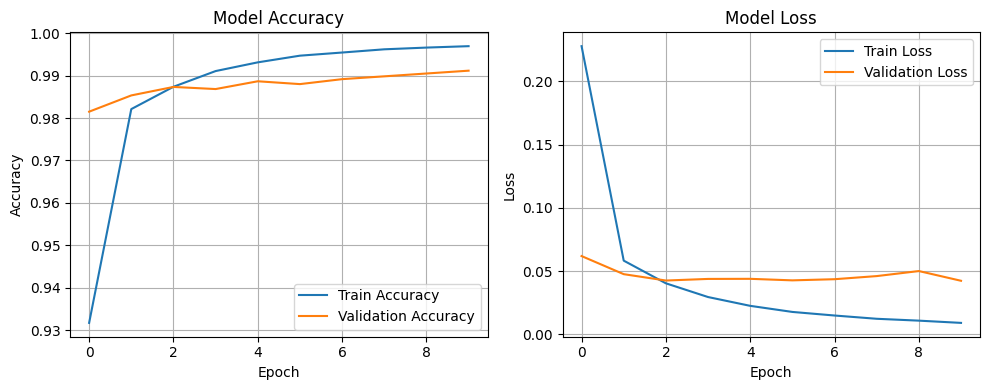

In [9]:
# Plot training history 
history_dict = history.history  # Keras stores logs here

plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. Evaluation

In [10]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc*100:.2f}%")

 1/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9922 - loss: 0.0255

 4/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9933 - loss: 0.0225

 6/79 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9929 - loss: 0.0233

 8/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9924 - loss: 0.0244

11/79 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9913 - loss: 0.0274

14/79 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9905 - loss: 0.0295

17/79 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9900 - loss: 0.0320

20/79 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9896 - loss: 0.0349

23/79 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9893 - loss: 0.0372

26/79 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9890 - loss: 0.0392

29/79 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9888 - loss: 0.0407

32/79 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9887 - loss: 0.0420

35/79 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9885 - loss: 0.0429

38/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9884 - loss: 0.0436

41/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9883 - loss: 0.0442

44/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9883 - loss: 0.0444

47/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9884 - loss: 0.0445

50/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9884 - loss: 0.0444

53/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9884 - loss: 0.0444

56/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9885 - loss: 0.0443

59/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9886 - loss: 0.0442

62/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9886 - loss: 0.0439

65/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9887 - loss: 0.0436

68/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9888 - loss: 0.0432

71/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9889 - loss: 0.0428

74/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9891 - loss: 0.0424

77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9892 - loss: 0.0421

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9917 - loss: 0.0332


Test loss: 0.0332, Test accuracy: 99.17%
